# Question 1

 ## Linear Regression with Mean Absolute Error as the cost function from scratch. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [22]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_feature = pd.DataFrame(data = diabetes['data'], columns = diabetes['feature_names'])
df_feature.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [23]:
df_target = pd.DataFrame(data = diabetes['target'], columns = ['Diabetes'])
df_target.head()

,Diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [24]:
X = df_feature.values
y = df_target.values

print(X.shape)
print(y.shape)


# Train test split
split_size = 0.8

train_size = int(split_size * len(X))
X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print(f'train size : {len(X_train)}, test size : {len(X_test)}')


# Normalization
mu = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

X_train = (X_train-mu)/std

(442, 10)
(442, 1)
train size : 353, test size : 89


In [25]:
# Define the MAE cost function
def cost_function(y_true, y_pred):
    m = len(y_true)
    return (1 / m) * np.sum(np.abs(y_true - y_pred))

# Initialize the model parameters
m, n = X_train.shape
theta = np.random.randn(n, 1)
bias = np.random.randn()

# Define the model
def linear_regression(X, theta, bias):
    return np.dot(X, theta) + bias

# Calculate gradients
def gradients(X, y, y_pred):
    m = len(y)
    grad_theta = (1 / m) * np.dot(X.T, np.sign(y_pred - y))
    grad_bias = (1 / m) * np.sum(np.sign(y_pred - y))
    return grad_theta, grad_bias

# Update the model parameters using gradient descent
def gradient_descent(X, y, theta, bias, learning_rate, iterations):
    for i in range(iterations):
        y_pred = linear_regression(X, theta, bias)
        grad_theta, grad_bias = gradients(X, y, y_pred)
        theta -= learning_rate * grad_theta
        bias -= learning_rate * grad_bias
        cost = cost_function(y, y_pred)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    return theta, bias

# Train the model
learning_rate = 0.1
iterations = 10000
theta, bias = gradient_descent(X_train, y_train.reshape(-1, 1), theta, bias, learning_rate, iterations)


Iteration 0: Cost = 151.11812894034932
Iteration 1000: Cost = 69.1428772109834
Iteration 2000: Cost = 46.4305281354831
Iteration 3000: Cost = 43.6746877356463
Iteration 4000: Cost = 43.28925807616558
Iteration 5000: Cost = 43.25743284714482
Iteration 6000: Cost = 43.25305747756413
Iteration 7000: Cost = 43.25100018253879
Iteration 8000: Cost = 43.24884693964191
Iteration 9000: Cost = 43.2467874960709


In [26]:
# Test the model

# Normalization
mu = np.mean(X_test, axis = 0)
std = np.std(X_test, axis = 0)

X_test = (X_test-mu)/std


y_test_pred = linear_regression(X_test, theta, bias)
mae_test = cost_function(y_test, y_test_pred)
print(f"Mean Absolute Error on the test set: {mae_test}")

Mean Absolute Error on the test set: 43.815324951291394


## Linear Regression With Scikit-Learn

In [30]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(type(diabetes))
print('\n')
print(diabetes.keys())

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [31]:
print(diabetes['DESCR']) #information of dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

### Setup dataFrame

In [32]:
df_feature = pd.DataFrame(data = diabetes['data'], columns = diabetes['feature_names'])
df_feature.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [33]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


#### this dataset has no missing values :)

In [34]:
df_target = pd.DataFrame(data = diabetes['target'], columns = ['Diabetes'])
df_target.head()

,Diabetes
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [36]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.2, random_state=101)

#Creating and training the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

#Prediction of model
prediction = lm.predict(X_test) #array type
np.array(y_test)

array([[179.],
       [168.],
       [281.],
       [ 60.],
       [186.],
       [258.],
       [317.],
       [140.],
       [152.],
       [134.],
       [115.],
       [164.],
       [ 72.],
       [128.],
       [129.],
       [281.],
       [199.],
       [197.],
       [275.],
       [ 60.],
       [232.],
       [ 84.],
       [173.],
       [ 83.],
       [162.],
       [172.],
       [245.],
       [ 44.],
       [202.],
       [104.],
       [168.],
       [178.],
       [141.],
       [103.],
       [ 59.],
       [274.],
       [185.],
       [ 90.],
       [ 72.],
       [281.],
       [154.],
       [ 64.],
       [253.],
       [242.],
       [252.],
       [ 47.],
       [108.],
       [346.],
       [190.],
       [137.],
       [118.],
       [ 25.],
       [ 54.],
       [ 51.],
       [ 59.],
       [ 67.],
       [ 71.],
       [ 91.],
       [184.],
       [110.],
       [111.],
       [ 80.],
       [ 45.],
       [263.],
       [180.],
       [ 79.],
       [ 9

Text(0, 0.5, 'prediction')

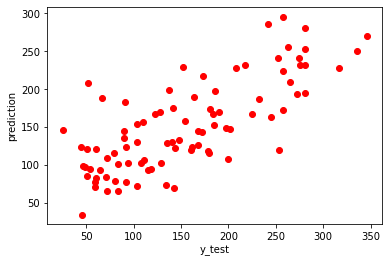

In [39]:
plt.scatter(y_test, prediction, color = 'r')
plt.xlabel('y_test')
plt.ylabel('prediction')


In [42]:
### Regression Evaluation Metrics

from sklearn import metrics
print('MAE : {}'.format(round(metrics.mean_absolute_error(y_test, prediction),2)))

MAE : 42.43


<AxesSubplot:ylabel='Count'>

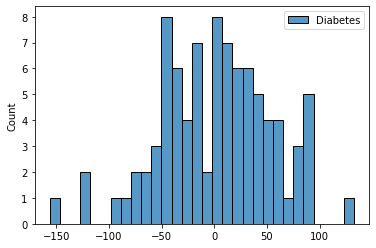

In [43]:
sns.histplot((y_test-prediction), bins=30)

#### ------------------------------------------------------------------------------------------------------

# Queastion 2

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_feature = pd.DataFrame(data = diabetes['data'], columns = diabetes['feature_names'])
df_feature.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [77]:
df_target = pd.DataFrame(data = diabetes['target'], columns = ['Diabetes'])

In [78]:
X = df_feature.values
y = df_target.values

print(X.shape)
print(y.shape)

(442, 10)
(442, 1)


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Add a column of ones to the training data for the bias term
def prepare_sets(X,y):
    N = len(X)
    X_b = np.c_[np.ones((N, 1)), X]    
    y_ = np.array(y).reshape(-1,1)
    
    return X_b, y_   

In [81]:
train_x, train_y = prepare_sets(X_train, y_train)
test_x, test_y = prepare_sets(X_test, y_test)

In [82]:
class NormaEquation():
    def __init__(self):
        return None
    
    def fit(self, X, y):        
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self.theta
    
    def predict(self, X):
        return X.dot(self.theta)
    
lr_n = NormaEquation()
lr_n.fit(train_x, train_y)
prediction = lr_n.predict(test_x)

In [83]:
from sklearn import metrics
print('MSE : {}'.format(round(metrics.mean_squared_error(test_y, prediction),2)))
print('MSE : {}'.format(round(metrics.r2_score(test_y, prediction),2)))


MSE : 3312.34
MSE : 0.43


<AxesSubplot:ylabel='Count'>

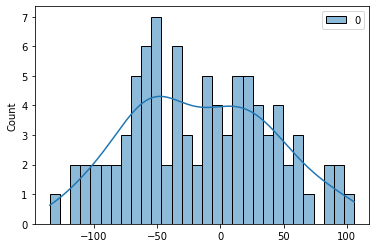

In [86]:
sns.histplot((test_y-prediction), bins=30, kde = True)

#### -------------------------------------------------------------------------------------------------

# Question 10

In [87]:
### Implement Forward and Backward Feature selection algorithms from scratch with MSE as the metric.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### forward feature selection

def forward_feature_selection(data, target, max_features=None):
    
    """ These functions take a feature matrix and a target variable 
            as input and return the indices of the selected features.
        
        Arguments:
                -data : Input,feature matrix , shape = (m,n) 
                -target : Input, target variable,  shape = (m,1)
                -max_features : Input,None, limiting the number of features to be selected.
        Outputs :
                -selected_features : List, Return the indices of the selected features
                
    """
    if max_features is None:
        max_features = data.shape[1]
    
    remaining_features = []
    selected_features = []
    best_mse = float('inf')
    
    while len(selected_features) < max_features:
        for feature in range(data.shape[1]): # data.shape[1] : number of feature in dataset
            if feature not in selected_features:
                remaining_features.append(feature)
                current_best_mse = float('inf')
                current_best_feature = None

        for feature in remaining_features:
            trial_features = selected_features + [feature]
             
            #using linear regression for simplicity    
            X_train, X_test, y_train, y_test = train_test_split(data[:, trial_features], target, test_size=0.2, random_state=101)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < current_best_mse:
                current_best_mse = mse
                current_best_feature = feature

        if current_best_mse < best_mse:
            selected_features.append(current_best_feature)
            best_mse = current_best_mse
        else:
            break

    return selected_features



### backward feature elimination

def backward_feature_elimination(data, target, max_features=None):
    
    """ These functions take a feature matrix and a target variable 
            as input and return the indices of the selected features.
        
        Arguments:
                -data : Input,feature matrix , shape = (m,n) 
                -target : Input, target variable,  shape = (m,1)
                -max_features : Input,None, limiting the number of features to be selected.
        Outputs :
                -selected_features : List, Return the indices of the selected features
                
    """
 
    if max_features is None:
        max_features = 1
    
    selected_features = list(range(data.shape[1]))
    trial_features = []

    while len(selected_features) > max_features:
        current_best_mse = float('inf')

        for feature in selected_features:
            for f in selected_features:
                if f!=feature:
                    trial_features.append(f)
        
            X_train, X_test, y_train, y_test = train_test_split(data[:, trial_features], target, test_size=0.2, random_state=42)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < current_best_mse:
                current_best_mse = mse
                current_eliminated_feature = feature
        
        selected_features.remove(current_eliminated_feature)

    return selected_features



#### -----------------------------------------------------------------------------------------------------

# Question 12

# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#reading dataset
df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\OnlineNewsPopularity\\OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# EDA  and  Prepocessing on data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

##### this dataset has no missing data.. this is good

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


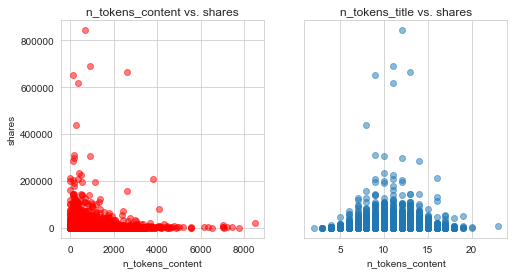

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.scatter(df[' n_tokens_content'], df[' shares'],alpha=0.5, c = 'r' )
plt.xlabel('n_tokens_content')
plt.ylabel('shares')
plt.title('n_tokens_content vs. shares')

plt.subplot(1, 2, 2)
plt.scatter(df[' n_tokens_title'], df[' shares'], alpha=0.5)
plt.xlabel('n_tokens_content')
plt.yticks([])
plt.title('n_tokens_title vs. shares')

plt.savefig('image1.jpg')

###### negative correlation between the number of words in the content and the number of shares

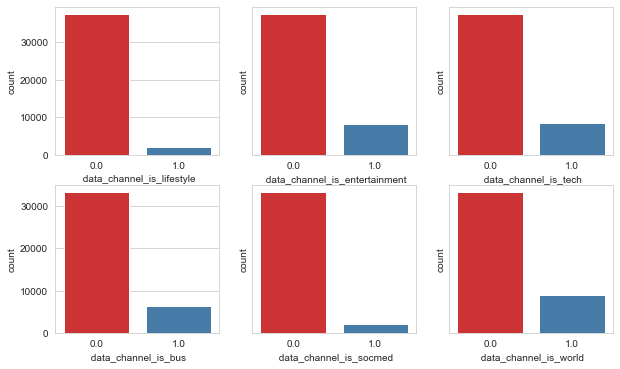

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

plt.subplot(2, 3, 1)
sns.countplot(x = ' data_channel_is_lifestyle', data = df, palette='Set1')
plt.subplot(2, 3, 2)
sns.countplot(x = ' data_channel_is_entertainment', data = df, palette='Set1')
plt.yticks([])
plt.subplot(2, 3, 3)
sns.countplot(x = ' data_channel_is_tech', data = df, palette='Set1')
plt.yticks([])
plt.subplot(2, 3, 4)
sns.countplot(x = ' data_channel_is_bus', data = df, palette='Set1')
plt.subplot(2, 3, 5)
sns.countplot(x = ' data_channel_is_socmed', data = df, palette='Set1')
plt.yticks([])
plt.subplot(2, 3, 6)
sns.countplot(x = ' data_channel_is_world', data = df, palette='Set1')
plt.yticks([])
plt.savefig('image2.jpg')

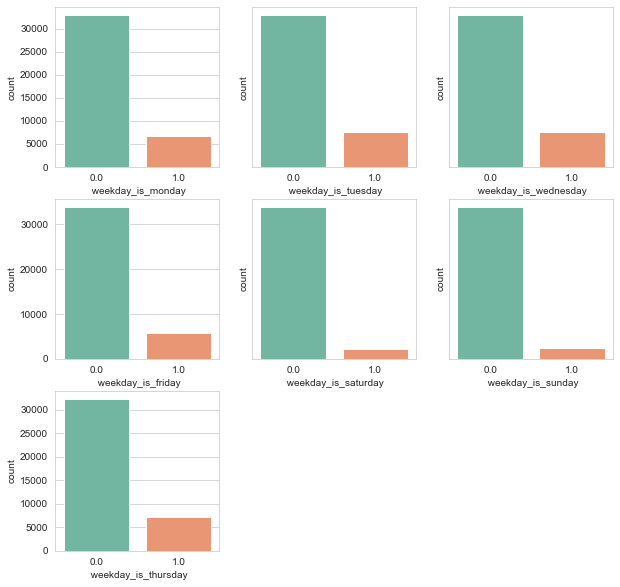

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 10))

plt.subplot(3, 3, 1)
sns.countplot(x = ' weekday_is_monday', data = df, palette='Set2')
plt.subplot(3, 3, 2)
sns.countplot(x = ' weekday_is_tuesday', data = df, palette='Set2')
plt.yticks([])
plt.subplot(3, 3, 3)
sns.countplot(x = ' weekday_is_wednesday', data = df, palette='Set2')
plt.yticks([])
plt.subplot(3, 3, 4)
sns.countplot(x = ' weekday_is_friday', data = df, palette='Set2')
plt.subplot(3, 3, 5)
sns.countplot(x = ' weekday_is_saturday', data = df, palette='Set2')
plt.yticks([])
plt.subplot(3, 3, 6)
sns.countplot(x = ' weekday_is_sunday', data = df, palette='Set2')
plt.yticks([])
plt.subplot(3, 3, 7)
sns.countplot(x = ' weekday_is_thursday', data = df, palette='Set2')
plt.savefig('image3.jpg')

<AxesSubplot:>

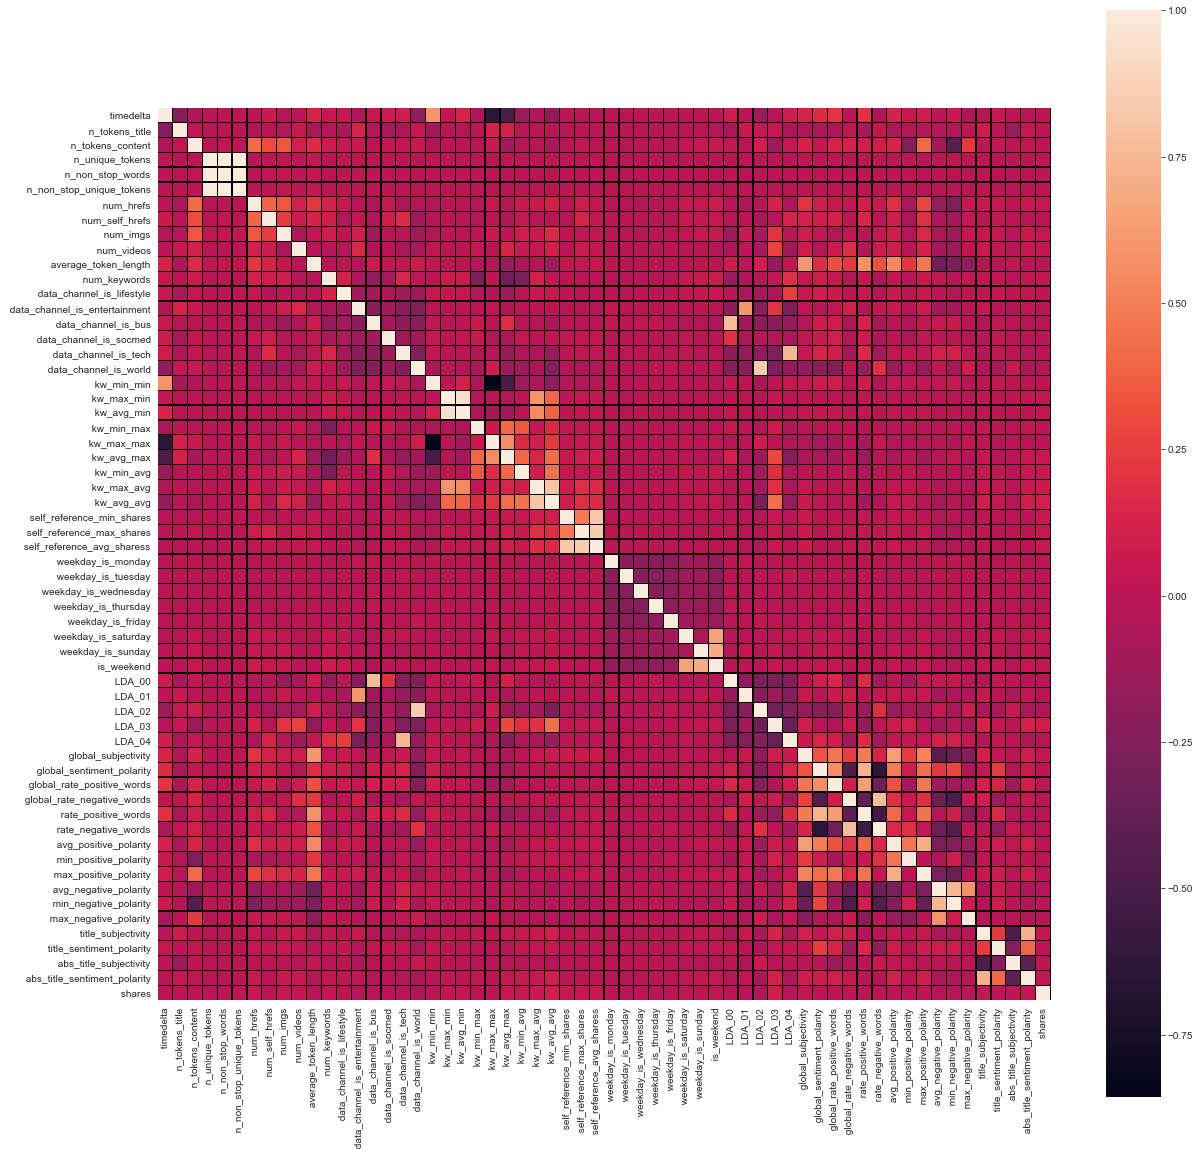

In [73]:
fig, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),linewidths=0.25, square=True, linecolor='black')

In [3]:
### URL is not important feature and is not numeric so I want to drop it
df.drop('url', axis = 1, inplace=True)
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# 1.Normality Tests

### Anderson-Darling Test

In [77]:
from scipy.stats import normaltest

num_cols = df.columns
for i in range(len(num_cols)):
    data = df[num_cols[i]]
    stat, p = normaltest(data)
    print('%s \n stat=%.4f, p=%.4f' % (df.columns[i] ,stat, p))
    if p > 0.05 :
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

 timedelta 
 stat=66833.6000, p=0.0000
Probably not Gaussian
 n_tokens_title 
 stat=178.2245, p=0.0000
Probably not Gaussian
 n_tokens_content 
 stat=27067.1724, p=0.0000
Probably not Gaussian
 n_unique_tokens 
 stat=193580.0648, p=0.0000
Probably not Gaussian
 n_non_stop_words 
 stat=193618.2789, p=0.0000
Probably not Gaussian
 n_non_stop_unique_tokens 
 stat=193521.0796, p=0.0000
Probably not Gaussian
 num_hrefs 
 stat=35089.8670, p=0.0000
Probably not Gaussian
 num_self_hrefs 
 stat=42092.0257, p=0.0000
Probably not Gaussian
 num_imgs 
 stat=33335.0926, p=0.0000
Probably not Gaussian
 num_videos 
 stat=50233.0379, p=0.0000
Probably not Gaussian
 average_token_length 
 stat=35953.5515, p=0.0000
Probably not Gaussian
 num_keywords 
 stat=3606.4267, p=0.0000
Probably not Gaussian
 data_channel_is_lifestyle 
 stat=31327.7716, p=0.0000
Probably not Gaussian
 data_channel_is_entertainment 
 stat=10129.2536, p=0.0000
Probably not Gaussian
 data_channel_is_bus 
 stat=12191.7630, p=0.0000
Pr

# 2. Correlation Tests

### Pearson’s Correlation Coefficient

In [78]:
from scipy.stats import pearsonr

for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            pass
        else:
            data1 = df[num_cols[i]]
            data2 = df[num_cols[j]]
            stat, p = pearsonr(data1, data2)
            print('%s , %s \n stat=%.4f, p=%.4f' % (df.columns[i] ,df.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably independent')
            else:
                print('Probably dependent')

 timedelta ,  n_tokens_title 
 stat=-0.2403, p=0.0000
Probably dependent
 timedelta ,  n_tokens_content 
 stat=-0.0629, p=0.0000
Probably dependent
 timedelta ,  n_unique_tokens 
 stat=0.0029, p=0.5682
Probably independent
 timedelta ,  n_non_stop_words 
 stat=0.0001, p=0.9858
Probably independent
 timedelta ,  n_non_stop_unique_tokens 
 stat=0.0038, p=0.4487
Probably independent
 timedelta ,  num_hrefs 
 stat=-0.0008, p=0.8684
Probably independent
 timedelta ,  num_self_hrefs 
 stat=0.0645, p=0.0000
Probably dependent
 timedelta ,  num_imgs 
 stat=-0.0276, p=0.0000
Probably dependent
 timedelta ,  num_videos 
 stat=0.0009, p=0.8522
Probably independent
 timedelta ,  average_token_length 
 stat=0.1305, p=0.0000
Probably dependent
 timedelta ,  num_keywords 
 stat=0.0469, p=0.0000
Probably dependent
 timedelta ,  data_channel_is_lifestyle 
 stat=0.0545, p=0.0000
Probably dependent
 timedelta ,  data_channel_is_entertainment 
 stat=-0.0491, p=0.0000
Probably dependent
 timedelta ,  data_

 stat=-0.0251, p=0.0000
Probably dependent
 n_tokens_title ,  max_positive_polarity 
 stat=-0.0217, p=0.0000
Probably dependent
 n_tokens_title ,  avg_negative_polarity 
 stat=-0.0171, p=0.0007
Probably dependent
 n_tokens_title ,  min_negative_polarity 
 stat=-0.0291, p=0.0000
Probably dependent
 n_tokens_title ,  max_negative_polarity 
 stat=0.0114, p=0.0229
Probably dependent
 n_tokens_title ,  title_subjectivity 
 stat=0.0772, p=0.0000
Probably dependent
 n_tokens_title ,  title_sentiment_polarity 
 stat=0.0002, p=0.9620
Probably independent
 n_tokens_title ,  abs_title_subjectivity 
 stat=-0.1470, p=0.0000
Probably dependent
 n_tokens_title ,  abs_title_sentiment_polarity 
 stat=0.0405, p=0.0000
Probably dependent
 n_tokens_title ,  shares 
 stat=0.0088, p=0.0803
Probably independent
 n_tokens_content ,  timedelta 
 stat=-0.0629, p=0.0000
Probably dependent
 n_tokens_content ,  n_tokens_title 
 stat=0.0182, p=0.0003
Probably dependent
 n_tokens_content ,  n_unique_tokens 
 stat=-0

 stat=-0.0005, p=0.9227
Probably independent
 n_unique_tokens ,  min_positive_polarity 
 stat=0.0092, p=0.0672
Probably independent
 n_unique_tokens ,  max_positive_polarity 
 stat=-0.0091, p=0.0714
Probably independent
 n_unique_tokens ,  avg_negative_polarity 
 stat=0.0015, p=0.7723
Probably independent
 n_unique_tokens ,  min_negative_polarity 
 stat=0.0099, p=0.0487
Probably dependent
 n_unique_tokens ,  max_negative_polarity 
 stat=-0.0073, p=0.1453
Probably independent
 n_unique_tokens ,  title_subjectivity 
 stat=-0.0047, p=0.3517
Probably independent
 n_unique_tokens ,  title_sentiment_polarity 
 stat=-0.0023, p=0.6422
Probably independent
 n_unique_tokens ,  abs_title_subjectivity 
 stat=-0.0092, p=0.0657
Probably independent
 n_unique_tokens ,  abs_title_sentiment_polarity 
 stat=-0.0042, p=0.4012
Probably independent
 n_unique_tokens ,  shares 
 stat=0.0008, p=0.8725
Probably independent
 n_non_stop_words ,  timedelta 
 stat=0.0001, p=0.9858
Probably independent
 n_non_stop_

 stat=-0.0010, p=0.8476
Probably independent
 n_non_stop_unique_tokens ,  LDA_02 
 stat=-0.0050, p=0.3229
Probably independent
 n_non_stop_unique_tokens ,  LDA_03 
 stat=-0.0098, p=0.0515
Probably independent
 n_non_stop_unique_tokens ,  LDA_04 
 stat=-0.0021, p=0.6763
Probably independent
 n_non_stop_unique_tokens ,  global_subjectivity 
 stat=0.0055, p=0.2736
Probably independent
 n_non_stop_unique_tokens ,  global_sentiment_polarity 
 stat=0.0020, p=0.6842
Probably independent
 n_non_stop_unique_tokens ,  global_rate_positive_words 
 stat=0.0050, p=0.3193
Probably independent
 n_non_stop_unique_tokens ,  global_rate_negative_words 
 stat=0.0026, p=0.6062
Probably independent
 n_non_stop_unique_tokens ,  rate_positive_words 
 stat=0.0053, p=0.2951
Probably independent
 n_non_stop_unique_tokens ,  rate_negative_words 
 stat=0.0017, p=0.7337
Probably independent
 n_non_stop_unique_tokens ,  avg_positive_polarity 
 stat=0.0047, p=0.3523
Probably independent
 n_non_stop_unique_tokens ,  

 stat=-0.0145, p=0.0040
Probably dependent
 num_self_hrefs ,  weekday_is_friday 
 stat=-0.0216, p=0.0000
Probably dependent
 num_self_hrefs ,  weekday_is_saturday 
 stat=0.0443, p=0.0000
Probably dependent
 num_self_hrefs ,  weekday_is_sunday 
 stat=0.0215, p=0.0000
Probably dependent
 num_self_hrefs ,  is_weekend 
 stat=0.0478, p=0.0000
Probably dependent
 num_self_hrefs ,  LDA_00 
 stat=-0.0217, p=0.0000
Probably dependent
 num_self_hrefs ,  LDA_01 
 stat=-0.0046, p=0.3565
Probably independent
 num_self_hrefs ,  LDA_02 
 stat=-0.0850, p=0.0000
Probably dependent
 num_self_hrefs ,  LDA_03 
 stat=-0.0288, p=0.0000
Probably dependent
 num_self_hrefs ,  LDA_04 
 stat=0.1354, p=0.0000
Probably dependent
 num_self_hrefs ,  global_subjectivity 
 stat=0.1153, p=0.0000
Probably dependent
 num_self_hrefs ,  global_sentiment_polarity 
 stat=0.0901, p=0.0000
Probably dependent
 num_self_hrefs ,  global_rate_positive_words 
 stat=0.1211, p=0.0000
Probably dependent
 num_self_hrefs ,  global_rate_

 stat=0.0095, p=0.0598
Probably independent
 num_videos ,  weekday_is_tuesday 
 stat=0.0067, p=0.1796
Probably independent
 num_videos ,  weekday_is_wednesday 
 stat=-0.0014, p=0.7809
Probably independent
 num_videos ,  weekday_is_thursday 
 stat=-0.0037, p=0.4658
Probably independent
 num_videos ,  weekday_is_friday 
 stat=0.0035, p=0.4892
Probably independent
 num_videos ,  weekday_is_saturday 
 stat=-0.0071, p=0.1554
Probably independent
 num_videos ,  weekday_is_sunday 
 stat=-0.0146, p=0.0037
Probably dependent
 num_videos ,  is_weekend 
 stat=-0.0161, p=0.0014
Probably dependent
 num_videos ,  LDA_00 
 stat=-0.0705, p=0.0000
Probably dependent
 num_videos ,  LDA_01 
 stat=0.0119, p=0.0181
Probably dependent
 num_videos ,  LDA_02 
 stat=-0.0930, p=0.0000
Probably dependent
 num_videos ,  LDA_03 
 stat=0.2677, p=0.0000
Probably dependent
 num_videos ,  LDA_04 
 stat=-0.1274, p=0.0000
Probably dependent
 num_videos ,  global_subjectivity 
 stat=0.0821, p=0.0000
Probably dependent
 n

 stat=-0.0877, p=0.0000
Probably dependent
 num_keywords ,  data_channel_is_tech 
 stat=0.1379, p=0.0000
Probably dependent
 num_keywords ,  data_channel_is_world 
 stat=0.0179, p=0.0004
Probably dependent
 num_keywords ,  kw_min_min 
 stat=0.0011, p=0.8316
Probably independent
 num_keywords ,  kw_max_min 
 stat=0.0775, p=0.0000
Probably dependent
 num_keywords ,  kw_avg_min 
 stat=0.0751, p=0.0000
Probably dependent
 num_keywords ,  kw_min_max 
 stat=-0.2780, p=0.0000
Probably dependent
 num_keywords ,  kw_max_max 
 stat=0.0085, p=0.0898
Probably independent
 num_keywords ,  kw_avg_max 
 stat=-0.3322, p=0.0000
Probably dependent
 num_keywords ,  kw_min_avg 
 stat=-0.2720, p=0.0000
Probably dependent
 num_keywords ,  kw_max_avg 
 stat=0.1140, p=0.0000
Probably dependent
 num_keywords ,  kw_avg_avg 
 stat=0.0238, p=0.0000
Probably dependent
 num_keywords ,  self_reference_min_shares 
 stat=-0.0053, p=0.2923
Probably independent
 num_keywords ,  self_reference_max_shares 
 stat=0.0105, p

 stat=-0.0080, p=0.1126
Probably independent
 data_channel_is_entertainment ,  num_self_hrefs 
 stat=0.0246, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  num_imgs 
 stat=0.0993, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  num_videos 
 stat=0.1468, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  average_token_length 
 stat=-0.0394, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  num_keywords 
 stat=-0.0729, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  data_channel_is_lifestyle 
 stat=-0.1100, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  data_channel_is_bus 
 stat=-0.2015, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  data_channel_is_socmed 
 stat=-0.1161, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  data_channel_is_tech 
 stat=-0.2219, p=0.0000
Probably dependent
 data_channel_is_entertainment ,  data_channel_is_world 
 stat=-0.2418, p=0.0000
Probably depende

 stat=-0.0325, p=0.0000
Probably dependent
 data_channel_is_bus ,  shares 
 stat=-0.0124, p=0.0137
Probably dependent
 data_channel_is_socmed ,  timedelta 
 stat=0.0763, p=0.0000
Probably dependent
 data_channel_is_socmed ,  n_tokens_title 
 stat=-0.0904, p=0.0000
Probably dependent
 data_channel_is_socmed ,  n_tokens_content 
 stat=0.0334, p=0.0000
Probably dependent
 data_channel_is_socmed ,  n_unique_tokens 
 stat=-0.0009, p=0.8508
Probably independent
 data_channel_is_socmed ,  n_non_stop_words 
 stat=-0.0001, p=0.9876
Probably independent
 data_channel_is_socmed ,  n_non_stop_unique_tokens 
 stat=-0.0005, p=0.9166
Probably independent
 data_channel_is_socmed ,  num_hrefs 
 stat=0.0505, p=0.0000
Probably dependent
 data_channel_is_socmed ,  num_self_hrefs 
 stat=0.0921, p=0.0000
Probably dependent
 data_channel_is_socmed ,  num_imgs 
 stat=-0.0076, p=0.1289
Probably independent
 data_channel_is_socmed ,  num_videos 
 stat=-0.0080, p=0.1095
Probably independent
 data_channel_is_socm

 stat=-0.0133, p=0.0083
Probably dependent
 data_channel_is_world ,  timedelta 
 stat=-0.1702, p=0.0000
Probably dependent
 data_channel_is_world ,  n_tokens_title 
 stat=0.0492, p=0.0000
Probably dependent
 data_channel_is_world ,  n_tokens_content 
 stat=0.0560, p=0.0000
Probably dependent
 data_channel_is_world ,  n_unique_tokens 
 stat=-0.0055, p=0.2704
Probably independent
 data_channel_is_world ,  n_non_stop_words 
 stat=-0.0027, p=0.5906
Probably independent
 data_channel_is_world ,  n_non_stop_unique_tokens 
 stat=-0.0038, p=0.4492
Probably independent
 data_channel_is_world ,  num_hrefs 
 stat=-0.0316, p=0.0000
Probably dependent
 data_channel_is_world ,  num_self_hrefs 
 stat=-0.1188, p=0.0000
Probably dependent
 data_channel_is_world ,  num_imgs 
 stat=-0.1065, p=0.0000
Probably dependent
 data_channel_is_world ,  num_videos 
 stat=-0.0886, p=0.0000
Probably dependent
 data_channel_is_world ,  average_token_length 
 stat=0.0799, p=0.0000
Probably dependent
 data_channel_is_w

 kw_min_min ,  min_positive_polarity 
 stat=0.0229, p=0.0000
Probably dependent
 kw_min_min ,  max_positive_polarity 
 stat=0.0186, p=0.0002
Probably dependent
 kw_min_min ,  avg_negative_polarity 
 stat=0.0173, p=0.0006
Probably dependent
 kw_min_min ,  min_negative_polarity 
 stat=0.0503, p=0.0000
Probably dependent
 kw_min_min ,  max_negative_polarity 
 stat=-0.0272, p=0.0000
Probably dependent
 kw_min_min ,  title_subjectivity 
 stat=-0.0044, p=0.3833
Probably independent
 kw_min_min ,  title_sentiment_polarity 
 stat=0.0329, p=0.0000
Probably dependent
 kw_min_min ,  abs_title_subjectivity 
 stat=0.0081, p=0.1052
Probably independent
 kw_min_min ,  abs_title_sentiment_polarity 
 stat=0.0076, p=0.1280
Probably independent
 kw_min_min ,  shares 
 stat=-0.0011, p=0.8343
Probably independent
 kw_max_min ,  timedelta 
 stat=0.0295, p=0.0000
Probably dependent
 kw_max_min ,  n_tokens_title 
 stat=-0.0059, p=0.2409
Probably independent
 kw_max_min ,  n_tokens_content 
 stat=0.0001, p=0.9

 stat=0.0058, p=0.2449
Probably independent
 kw_avg_min ,  global_subjectivity 
 stat=0.0219, p=0.0000
Probably dependent
 kw_avg_min ,  global_sentiment_polarity 
 stat=0.0268, p=0.0000
Probably dependent
 kw_avg_min ,  global_rate_positive_words 
 stat=0.0330, p=0.0000
Probably dependent
 kw_avg_min ,  global_rate_negative_words 
 stat=0.0002, p=0.9701
Probably independent
 kw_avg_min ,  rate_positive_words 
 stat=0.0264, p=0.0000
Probably dependent
 kw_avg_min ,  rate_negative_words 
 stat=-0.0162, p=0.0012
Probably dependent
 kw_avg_min ,  avg_positive_polarity 
 stat=0.0192, p=0.0001
Probably dependent
 kw_avg_min ,  min_positive_polarity 
 stat=0.0042, p=0.3989
Probably independent
 kw_avg_min ,  max_positive_polarity 
 stat=0.0226, p=0.0000
Probably dependent
 kw_avg_min ,  avg_negative_polarity 
 stat=-0.0037, p=0.4566
Probably independent
 kw_avg_min ,  min_negative_polarity 
 stat=0.0013, p=0.7973
Probably independent
 kw_avg_min ,  max_negative_polarity 
 stat=-0.0052, p=0.3

 stat=-0.0029, p=0.5584
Probably independent
 kw_avg_max ,  n_non_stop_unique_tokens 
 stat=-0.0020, p=0.6896
Probably independent
 kw_avg_max ,  num_hrefs 
 stat=-0.0193, p=0.0001
Probably dependent
 kw_avg_max ,  num_self_hrefs 
 stat=-0.0647, p=0.0000
Probably dependent
 kw_avg_max ,  num_imgs 
 stat=0.0022, p=0.6589
Probably independent
 kw_avg_max ,  num_videos 
 stat=0.1362, p=0.0000
Probably dependent
 kw_avg_max ,  average_token_length 
 stat=-0.1574, p=0.0000
Probably dependent
 kw_avg_max ,  num_keywords 
 stat=-0.3322, p=0.0000
Probably dependent
 kw_avg_max ,  data_channel_is_lifestyle 
 stat=-0.1321, p=0.0000
Probably dependent
 kw_avg_max ,  data_channel_is_entertainment 
 stat=-0.0527, p=0.0000
Probably dependent
 kw_avg_max ,  data_channel_is_bus 
 stat=0.1800, p=0.0000
Probably dependent
 kw_avg_max ,  data_channel_is_socmed 
 stat=-0.0605, p=0.0000
Probably dependent
 kw_avg_max ,  data_channel_is_tech 
 stat=-0.1617, p=0.0000
Probably dependent
 kw_avg_max ,  data_ch

 stat=0.0250, p=0.0000
Probably dependent
 kw_min_avg ,  abs_title_subjectivity 
 stat=-0.0168, p=0.0008
Probably dependent
 kw_min_avg ,  abs_title_sentiment_polarity 
 stat=0.0548, p=0.0000
Probably dependent
 kw_min_avg ,  shares 
 stat=0.0396, p=0.0000
Probably dependent
 kw_max_avg ,  timedelta 
 stat=-0.0518, p=0.0000
Probably dependent
 kw_max_avg ,  n_tokens_title 
 stat=0.0069, p=0.1684
Probably independent
 kw_max_avg ,  n_tokens_content 
 stat=-0.0305, p=0.0000
Probably dependent
 kw_max_avg ,  n_unique_tokens 
 stat=-0.0021, p=0.6730
Probably independent
 kw_max_avg ,  n_non_stop_words 
 stat=-0.0034, p=0.4974
Probably independent
 kw_max_avg ,  n_non_stop_unique_tokens 
 stat=-0.0037, p=0.4621
Probably independent
 kw_max_avg ,  num_hrefs 
 stat=0.0697, p=0.0000
Probably dependent
 kw_max_avg ,  num_self_hrefs 
 stat=-0.0136, p=0.0067
Probably dependent
 kw_max_avg ,  num_imgs 
 stat=0.0644, p=0.0000
Probably dependent
 kw_max_avg ,  num_videos 
 stat=0.0450, p=0.0000
Prob

Probably dependent
 kw_avg_avg ,  avg_positive_polarity 
 stat=0.0437, p=0.0000
Probably dependent
 kw_avg_avg ,  min_positive_polarity 
 stat=0.0500, p=0.0000
Probably dependent
 kw_avg_avg ,  max_positive_polarity 
 stat=-0.0055, p=0.2710
Probably independent
 kw_avg_avg ,  avg_negative_polarity 
 stat=-0.0728, p=0.0000
Probably dependent
 kw_avg_avg ,  min_negative_polarity 
 stat=-0.0203, p=0.0001
Probably dependent
 kw_avg_avg ,  max_negative_polarity 
 stat=-0.0467, p=0.0000
Probably dependent
 kw_avg_avg ,  title_subjectivity 
 stat=0.0978, p=0.0000
Probably dependent
 kw_avg_avg ,  title_sentiment_polarity 
 stat=0.0357, p=0.0000
Probably dependent
 kw_avg_avg ,  abs_title_subjectivity 
 stat=-0.0239, p=0.0000
Probably dependent
 kw_avg_avg ,  abs_title_sentiment_polarity 
 stat=0.0987, p=0.0000
Probably dependent
 kw_avg_avg ,  shares 
 stat=0.1104, p=0.0000
Probably dependent
 self_reference_min_shares ,  timedelta 
 stat=-0.0114, p=0.0228
Probably dependent
 self_reference_m

 stat=0.0260, p=0.0000
Probably dependent
 self_reference_max_shares ,  rate_negative_words 
 stat=0.0163, p=0.0012
Probably dependent
 self_reference_max_shares ,  avg_positive_polarity 
 stat=0.0424, p=0.0000
Probably dependent
 self_reference_max_shares ,  min_positive_polarity 
 stat=-0.0024, p=0.6302
Probably independent
 self_reference_max_shares ,  max_positive_polarity 
 stat=0.0399, p=0.0000
Probably dependent
 self_reference_max_shares ,  avg_negative_polarity 
 stat=-0.0538, p=0.0000
Probably dependent
 self_reference_max_shares ,  min_negative_polarity 
 stat=-0.0471, p=0.0000
Probably dependent
 self_reference_max_shares ,  max_negative_polarity 
 stat=-0.0226, p=0.0000
Probably dependent
 self_reference_max_shares ,  title_subjectivity 
 stat=0.0138, p=0.0062
Probably dependent
 self_reference_max_shares ,  title_sentiment_polarity 
 stat=0.0048, p=0.3403
Probably independent
 self_reference_max_shares ,  abs_title_subjectivity 
 stat=-0.0049, p=0.3258
Probably independen

 stat=-0.0157, p=0.0018
Probably dependent
 weekday_is_monday ,  LDA_03 
 stat=-0.0085, p=0.0893
Probably independent
 weekday_is_monday ,  LDA_04 
 stat=-0.0018, p=0.7155
Probably independent
 weekday_is_monday ,  global_subjectivity 
 stat=-0.0081, p=0.1056
Probably independent
 weekday_is_monday ,  global_sentiment_polarity 
 stat=-0.0097, p=0.0523
Probably independent
 weekday_is_monday ,  global_rate_positive_words 
 stat=-0.0078, p=0.1196
Probably independent
 weekday_is_monday ,  global_rate_negative_words 
 stat=0.0087, p=0.0841
Probably independent
 weekday_is_monday ,  rate_positive_words 
 stat=-0.0037, p=0.4628
Probably independent
 weekday_is_monday ,  rate_negative_words 
 stat=0.0081, p=0.1083
Probably independent
 weekday_is_monday ,  avg_positive_polarity 
 stat=0.0027, p=0.5924
Probably independent
 weekday_is_monday ,  min_positive_polarity 
 stat=-0.0012, p=0.8079
Probably independent
 weekday_is_monday ,  max_positive_polarity 
 stat=0.0064, p=0.2019
Probably indep

 stat=-0.1865, p=0.0000
Probably dependent
 weekday_is_wednesday ,  LDA_00 
 stat=0.0133, p=0.0083
Probably dependent
 weekday_is_wednesday ,  LDA_01 
 stat=-0.0088, p=0.0810
Probably independent
 weekday_is_wednesday ,  LDA_02 
 stat=0.0013, p=0.7900
Probably independent
 weekday_is_wednesday ,  LDA_03 
 stat=-0.0133, p=0.0081
Probably dependent
 weekday_is_wednesday ,  LDA_04 
 stat=0.0069, p=0.1683
Probably independent
 weekday_is_wednesday ,  global_subjectivity 
 stat=-0.0079, p=0.1148
Probably independent
 weekday_is_wednesday ,  global_sentiment_polarity 
 stat=-0.0001, p=0.9851
Probably independent
 weekday_is_wednesday ,  global_rate_positive_words 
 stat=-0.0051, p=0.3089
Probably independent
 weekday_is_wednesday ,  global_rate_negative_words 
 stat=-0.0162, p=0.0012
Probably dependent
 weekday_is_wednesday ,  rate_positive_words 
 stat=0.0064, p=0.2027
Probably independent
 weekday_is_wednesday ,  rate_negative_words 
 stat=-0.0109, p=0.0296
Probably dependent
 weekday_is_w

 stat=-0.1969, p=0.0000
Probably dependent
 weekday_is_friday ,  weekday_is_thursday 
 stat=-0.1942, p=0.0000
Probably dependent
 weekday_is_friday ,  weekday_is_saturday 
 stat=-0.1053, p=0.0000
Probably dependent
 weekday_is_friday ,  weekday_is_sunday 
 stat=-0.1116, p=0.0000
Probably dependent
 weekday_is_friday ,  is_weekend 
 stat=-0.1591, p=0.0000
Probably dependent
 weekday_is_friday ,  LDA_00 
 stat=-0.0158, p=0.0017
Probably dependent
 weekday_is_friday ,  LDA_01 
 stat=-0.0066, p=0.1878
Probably independent
 weekday_is_friday ,  LDA_02 
 stat=0.0194, p=0.0001
Probably dependent
 weekday_is_friday ,  LDA_03 
 stat=0.0117, p=0.0196
Probably dependent
 weekday_is_friday ,  LDA_04 
 stat=-0.0115, p=0.0224
Probably dependent
 weekday_is_friday ,  global_subjectivity 
 stat=0.0105, p=0.0366
Probably dependent
 weekday_is_friday ,  global_sentiment_polarity 
 stat=-0.0145, p=0.0038
Probably dependent
 weekday_is_friday ,  global_rate_positive_words 
 stat=-0.0155, p=0.0020
Probably

 stat=-0.1224, p=0.0000
Probably dependent
 weekday_is_sunday ,  weekday_is_tuesday 
 stat=-0.1304, p=0.0000
Probably dependent
 weekday_is_sunday ,  weekday_is_wednesday 
 stat=-0.1308, p=0.0000
Probably dependent
 weekday_is_sunday ,  weekday_is_thursday 
 stat=-0.1290, p=0.0000
Probably dependent
 weekday_is_sunday ,  weekday_is_friday 
 stat=-0.1116, p=0.0000
Probably dependent
 weekday_is_sunday ,  weekday_is_saturday 
 stat=-0.0699, p=0.0000
Probably dependent
 weekday_is_sunday ,  is_weekend 
 stat=0.7016, p=0.0000
Probably dependent
 weekday_is_sunday ,  LDA_00 
 stat=-0.0196, p=0.0001
Probably dependent
 weekday_is_sunday ,  LDA_01 
 stat=0.0220, p=0.0000
Probably dependent
 weekday_is_sunday ,  LDA_02 
 stat=-0.0125, p=0.0126
Probably dependent
 weekday_is_sunday ,  LDA_03 
 stat=0.0340, p=0.0000
Probably dependent
 weekday_is_sunday ,  LDA_04 
 stat=-0.0214, p=0.0000
Probably dependent
 weekday_is_sunday ,  global_subjectivity 
 stat=0.0124, p=0.0133
Probably dependent
 week

 stat=-0.0157, p=0.0017
Probably dependent
 LDA_00 ,  kw_avg_avg 
 stat=-0.0371, p=0.0000
Probably dependent
 LDA_00 ,  self_reference_min_shares 
 stat=0.0018, p=0.7127
Probably independent
 LDA_00 ,  self_reference_max_shares 
 stat=0.0138, p=0.0059
Probably dependent
 LDA_00 ,  self_reference_avg_sharess 
 stat=0.0077, p=0.1268
Probably independent
 LDA_00 ,  weekday_is_monday 
 stat=0.0084, p=0.0930
Probably independent
 LDA_00 ,  weekday_is_tuesday 
 stat=-0.0014, p=0.7847
Probably independent
 LDA_00 ,  weekday_is_wednesday 
 stat=0.0133, p=0.0083
Probably dependent
 LDA_00 ,  weekday_is_thursday 
 stat=0.0193, p=0.0001
Probably dependent
 LDA_00 ,  weekday_is_friday 
 stat=-0.0158, p=0.0017
Probably dependent
 LDA_00 ,  weekday_is_saturday 
 stat=-0.0197, p=0.0001
Probably dependent
 LDA_00 ,  weekday_is_sunday 
 stat=-0.0196, p=0.0001
Probably dependent
 LDA_00 ,  is_weekend 
 stat=-0.0288, p=0.0000
Probably dependent
 LDA_00 ,  LDA_01 
 stat=-0.1793, p=0.0000
Probably dependen

 LDA_02 ,  kw_avg_max 
 stat=-0.1199, p=0.0000
Probably dependent
 LDA_02 ,  kw_min_avg 
 stat=-0.1251, p=0.0000
Probably dependent
 LDA_02 ,  kw_max_avg 
 stat=-0.1013, p=0.0000
Probably dependent
 LDA_02 ,  kw_avg_avg 
 stat=-0.2717, p=0.0000
Probably dependent
 LDA_02 ,  self_reference_min_shares 
 stat=-0.0392, p=0.0000
Probably dependent
 LDA_02 ,  self_reference_max_shares 
 stat=-0.0444, p=0.0000
Probably dependent
 LDA_02 ,  self_reference_avg_sharess 
 stat=-0.0488, p=0.0000
Probably dependent
 LDA_02 ,  weekday_is_monday 
 stat=-0.0157, p=0.0018
Probably dependent
 LDA_02 ,  weekday_is_tuesday 
 stat=0.0006, p=0.9080
Probably independent
 LDA_02 ,  weekday_is_wednesday 
 stat=0.0013, p=0.7900
Probably independent
 LDA_02 ,  weekday_is_thursday 
 stat=0.0017, p=0.7303
Probably independent
 LDA_02 ,  weekday_is_friday 
 stat=0.0194, p=0.0001
Probably dependent
 LDA_02 ,  weekday_is_saturday 
 stat=0.0034, p=0.5027
Probably independent
 LDA_02 ,  weekday_is_sunday 
 stat=-0.0125

 stat=-0.0598, p=0.0000
Probably dependent
 LDA_04 ,  kw_max_max 
 stat=-0.0501, p=0.0000
Probably dependent
 LDA_04 ,  kw_avg_max 
 stat=-0.2295, p=0.0000
Probably dependent
 LDA_04 ,  kw_min_avg 
 stat=-0.0563, p=0.0000
Probably dependent
 LDA_04 ,  kw_max_avg 
 stat=-0.0871, p=0.0000
Probably dependent
 LDA_04 ,  kw_avg_avg 
 stat=-0.1535, p=0.0000
Probably dependent
 LDA_04 ,  self_reference_min_shares 
 stat=0.0098, p=0.0514
Probably independent
 LDA_04 ,  self_reference_max_shares 
 stat=0.0020, p=0.6969
Probably independent
 LDA_04 ,  self_reference_avg_sharess 
 stat=0.0061, p=0.2283
Probably independent
 LDA_04 ,  weekday_is_monday 
 stat=-0.0018, p=0.7155
Probably independent
 LDA_04 ,  weekday_is_tuesday 
 stat=0.0154, p=0.0021
Probably dependent
 LDA_04 ,  weekday_is_wednesday 
 stat=0.0069, p=0.1683
Probably independent
 LDA_04 ,  weekday_is_thursday 
 stat=-0.0062, p=0.2144
Probably independent
 LDA_04 ,  weekday_is_friday 
 stat=-0.0115, p=0.0224
Probably dependent
 LDA_

 stat=0.1302, p=0.0000
Probably dependent
 global_sentiment_polarity ,  data_channel_is_world 
 stat=-0.2292, p=0.0000
Probably dependent
 global_sentiment_polarity ,  kw_min_min 
 stat=0.0755, p=0.0000
Probably dependent
 global_sentiment_polarity ,  kw_max_min 
 stat=0.0089, p=0.0762
Probably independent
 global_sentiment_polarity ,  kw_avg_min 
 stat=0.0268, p=0.0000
Probably dependent
 global_sentiment_polarity ,  kw_min_max 
 stat=-0.0145, p=0.0040
Probably dependent
 global_sentiment_polarity ,  kw_max_max 
 stat=-0.0845, p=0.0000
Probably dependent
 global_sentiment_polarity ,  kw_avg_max 
 stat=-0.0854, p=0.0000
Probably dependent
 global_sentiment_polarity ,  kw_min_avg 
 stat=-0.0027, p=0.5968
Probably independent
 global_sentiment_polarity ,  kw_max_avg 
 stat=0.0099, p=0.0495
Probably dependent
 global_sentiment_polarity ,  kw_avg_avg 
 stat=0.0142, p=0.0046
Probably dependent
 global_sentiment_polarity ,  self_reference_min_shares 
 stat=0.0062, p=0.2162
Probably independe

 stat=0.2287, p=0.0000
Probably dependent
 global_rate_negative_words ,  num_keywords 
 stat=-0.0380, p=0.0000
Probably dependent
 global_rate_negative_words ,  data_channel_is_lifestyle 
 stat=-0.0062, p=0.2198
Probably independent
 global_rate_negative_words ,  data_channel_is_entertainment 
 stat=0.1050, p=0.0000
Probably dependent
 global_rate_negative_words ,  data_channel_is_bus 
 stat=-0.0751, p=0.0000
Probably dependent
 global_rate_negative_words ,  data_channel_is_socmed 
 stat=-0.0197, p=0.0001
Probably dependent
 global_rate_negative_words ,  data_channel_is_tech 
 stat=-0.0959, p=0.0000
Probably dependent
 global_rate_negative_words ,  data_channel_is_world 
 stat=0.0189, p=0.0002
Probably dependent
 global_rate_negative_words ,  kw_min_min 
 stat=-0.0020, p=0.6870
Probably independent
 global_rate_negative_words ,  kw_max_min 
 stat=-0.0005, p=0.9263
Probably independent
 global_rate_negative_words ,  kw_avg_min 
 stat=0.0002, p=0.9701
Probably independent
 global_rate_ne

 stat=0.0342, p=0.0000
Probably dependent
 rate_negative_words ,  n_tokens_content 
 stat=0.1011, p=0.0000
Probably dependent
 rate_negative_words ,  n_unique_tokens 
 stat=-0.0017, p=0.7414
Probably independent
 rate_negative_words ,  n_non_stop_words 
 stat=0.0012, p=0.8043
Probably independent
 rate_negative_words ,  n_non_stop_unique_tokens 
 stat=0.0017, p=0.7337
Probably independent
 rate_negative_words ,  num_hrefs 
 stat=0.0598, p=0.0000
Probably dependent
 rate_negative_words ,  num_self_hrefs 
 stat=-0.0102, p=0.0425
Probably dependent
 rate_negative_words ,  num_imgs 
 stat=0.0400, p=0.0000
Probably dependent
 rate_negative_words ,  num_videos 
 stat=0.0741, p=0.0000
Probably dependent
 rate_negative_words ,  average_token_length 
 stat=0.3225, p=0.0000
Probably dependent
 rate_negative_words ,  num_keywords 
 stat=-0.0709, p=0.0000
Probably dependent
 rate_negative_words ,  data_channel_is_lifestyle 
 stat=-0.0319, p=0.0000
Probably dependent
 rate_negative_words ,  data_ch

 stat=-0.1398, p=0.0000
Probably dependent
 avg_positive_polarity ,  title_subjectivity 
 stat=0.0524, p=0.0000
Probably dependent
 avg_positive_polarity ,  title_sentiment_polarity 
 stat=0.0795, p=0.0000
Probably dependent
 avg_positive_polarity ,  abs_title_subjectivity 
 stat=0.0151, p=0.0026
Probably dependent
 avg_positive_polarity ,  abs_title_sentiment_polarity 
 stat=0.1012, p=0.0000
Probably dependent
 avg_positive_polarity ,  shares 
 stat=0.0121, p=0.0156
Probably dependent
 min_positive_polarity ,  timedelta 
 stat=0.0548, p=0.0000
Probably dependent
 min_positive_polarity ,  n_tokens_title 
 stat=-0.0251, p=0.0000
Probably dependent
 min_positive_polarity ,  n_tokens_content 
 stat=-0.2615, p=0.0000
Probably dependent
 min_positive_polarity ,  n_unique_tokens 
 stat=0.0092, p=0.0672
Probably independent
 min_positive_polarity ,  n_non_stop_words 
 stat=0.0009, p=0.8572
Probably independent
 min_positive_polarity ,  n_non_stop_unique_tokens 
 stat=0.0084, p=0.0952
Probably

 stat=0.4510, p=0.0000
Probably dependent
 max_positive_polarity ,  rate_negative_words 
 stat=0.0357, p=0.0000
Probably dependent
 max_positive_polarity ,  avg_positive_polarity 
 stat=0.7036, p=0.0000
Probably dependent
 max_positive_polarity ,  min_positive_polarity 
 stat=0.0096, p=0.0560
Probably independent
 max_positive_polarity ,  avg_negative_polarity 
 stat=-0.2688, p=0.0000
Probably dependent
 max_positive_polarity ,  min_negative_polarity 
 stat=-0.3609, p=0.0000
Probably dependent
 max_positive_polarity ,  max_negative_polarity 
 stat=-0.0053, p=0.2956
Probably independent
 max_positive_polarity ,  title_subjectivity 
 stat=0.0528, p=0.0000
Probably dependent
 max_positive_polarity ,  title_sentiment_polarity 
 stat=0.0769, p=0.0000
Probably dependent
 max_positive_polarity ,  abs_title_subjectivity 
 stat=-0.0171, p=0.0006
Probably dependent
 max_positive_polarity ,  abs_title_sentiment_polarity 
 stat=0.0830, p=0.0000
Probably dependent
 max_positive_polarity ,  shares 


 min_negative_polarity ,  LDA_02 
 stat=-0.0691, p=0.0000
Probably dependent
 min_negative_polarity ,  LDA_03 
 stat=-0.0256, p=0.0000
Probably dependent
 min_negative_polarity ,  LDA_04 
 stat=0.1042, p=0.0000
Probably dependent
 min_negative_polarity ,  global_subjectivity 
 stat=-0.3501, p=0.0000
Probably dependent
 min_negative_polarity ,  global_sentiment_polarity 
 stat=0.2854, p=0.0000
Probably dependent
 min_negative_polarity ,  global_rate_positive_words 
 stat=-0.1154, p=0.0000
Probably dependent
 min_negative_polarity ,  global_rate_negative_words 
 stat=-0.4785, p=0.0000
Probably dependent
 min_negative_polarity ,  rate_positive_words 
 stat=0.0887, p=0.0000
Probably dependent
 min_negative_polarity ,  rate_negative_words 
 stat=-0.4525, p=0.0000
Probably dependent
 min_negative_polarity ,  avg_positive_polarity 
 stat=-0.2322, p=0.0000
Probably dependent
 min_negative_polarity ,  min_positive_polarity 
 stat=0.0913, p=0.0000
Probably dependent
 min_negative_polarity ,  max

 stat=0.0138, p=0.0062
Probably dependent
 title_subjectivity ,  self_reference_avg_sharess 
 stat=0.0102, p=0.0428
Probably dependent
 title_subjectivity ,  weekday_is_monday 
 stat=-0.0096, p=0.0549
Probably independent
 title_subjectivity ,  weekday_is_tuesday 
 stat=-0.0040, p=0.4284
Probably independent
 title_subjectivity ,  weekday_is_wednesday 
 stat=-0.0108, p=0.0311
Probably dependent
 title_subjectivity ,  weekday_is_thursday 
 stat=0.0031, p=0.5349
Probably independent
 title_subjectivity ,  weekday_is_friday 
 stat=0.0003, p=0.9578
Probably independent
 title_subjectivity ,  weekday_is_saturday 
 stat=0.0077, p=0.1252
Probably independent
 title_subjectivity ,  weekday_is_sunday 
 stat=0.0246, p=0.0000
Probably dependent
 title_subjectivity ,  is_weekend 
 stat=0.0240, p=0.0000
Probably dependent
 title_subjectivity ,  LDA_00 
 stat=-0.0488, p=0.0000
Probably dependent
 title_subjectivity ,  LDA_01 
 stat=0.0544, p=0.0000
Probably dependent
 title_subjectivity ,  LDA_02 
 

 stat=-0.0168, p=0.0008
Probably dependent
 abs_title_subjectivity ,  kw_max_avg 
 stat=-0.0124, p=0.0134
Probably dependent
 abs_title_subjectivity ,  kw_avg_avg 
 stat=-0.0239, p=0.0000
Probably dependent
 abs_title_subjectivity ,  self_reference_min_shares 
 stat=0.0024, p=0.6382
Probably independent
 abs_title_subjectivity ,  self_reference_max_shares 
 stat=-0.0049, p=0.3258
Probably independent
 abs_title_subjectivity ,  self_reference_avg_sharess 
 stat=-0.0014, p=0.7740
Probably independent
 abs_title_subjectivity ,  weekday_is_monday 
 stat=-0.0024, p=0.6338
Probably independent
 abs_title_subjectivity ,  weekday_is_tuesday 
 stat=0.0116, p=0.0211
Probably dependent
 abs_title_subjectivity ,  weekday_is_wednesday 
 stat=0.0081, p=0.1081
Probably independent
 abs_title_subjectivity ,  weekday_is_thursday 
 stat=0.0044, p=0.3817
Probably independent
 abs_title_subjectivity ,  weekday_is_friday 
 stat=0.0095, p=0.0578
Probably independent
 abs_title_subjectivity ,  weekday_is_sat

 stat=0.0301, p=0.0000
Probably dependent
 shares ,  kw_avg_min 
 stat=0.0304, p=0.0000
Probably dependent
 shares ,  kw_min_max 
 stat=0.0039, p=0.4373
Probably independent
 shares ,  kw_max_max 
 stat=0.0079, p=0.1175
Probably independent
 shares ,  kw_avg_max 
 stat=0.0447, p=0.0000
Probably dependent
 shares ,  kw_min_avg 
 stat=0.0396, p=0.0000
Probably dependent
 shares ,  kw_max_avg 
 stat=0.0643, p=0.0000
Probably dependent
 shares ,  kw_avg_avg 
 stat=0.1104, p=0.0000
Probably dependent
 shares ,  self_reference_min_shares 
 stat=0.0560, p=0.0000
Probably dependent
 shares ,  self_reference_max_shares 
 stat=0.0471, p=0.0000
Probably dependent
 shares ,  self_reference_avg_sharess 
 stat=0.0578, p=0.0000
Probably dependent
 shares ,  weekday_is_monday 
 stat=0.0097, p=0.0528
Probably independent
 shares ,  weekday_is_tuesday 
 stat=-0.0079, p=0.1139
Probably independent
 shares ,  weekday_is_wednesday 
 stat=-0.0038, p=0.4492
Probably independent
 shares ,  weekday_is_thursday

# 3.Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test

In [79]:
from scipy.stats import mannwhitneyu

for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            data1 = df[num_cols[i]]
            data2 = df[num_cols[j]]
            stat, p = mannwhitneyu(data1, data2)
            print('%s and %s \n stat=%.4f, p=%.4f' % (df.columns[i] ,df.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably the same distribution')
            else:
                print('Probably different distributions')

 timedelta and  timedelta 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 n_tokens_title and  n_tokens_title 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 n_tokens_content and  n_tokens_content 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 n_unique_tokens and  n_unique_tokens 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 n_non_stop_words and  n_non_stop_words 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 n_non_stop_unique_tokens and  n_non_stop_unique_tokens 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 num_hrefs and  num_hrefs 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 num_self_hrefs and  num_self_hrefs 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 num_imgs and  num_imgs 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 num_videos and  num_videos 
 stat=785823368.0000, p=1.0000
Probably the same distribution
 average_token_lengt

# 4. Parametric Statistical Hypothesis Tests

### Student’s t-test


In [81]:
from scipy.stats import ttest_ind
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i == j:
            pass
        else:
            data1 = df[num_cols[i]]
            data2 = df[num_cols[j]]
            stat, p = ttest_ind(data1, data2)
            print('%s , %s \n stat=%.3f, p=%.3f' % (df.columns[i] ,df.columns[j] ,stat, p))
            if p > 0.05:
                print('Probably the same distribution')
            else:     
                print('Probably different distributions')

 timedelta ,  n_tokens_title 
 stat=319.924, p=0.000
Probably different distributions
 timedelta ,  n_tokens_content 
 stat=-73.866, p=0.000
Probably different distributions
 timedelta ,  n_unique_tokens 
 stat=329.053, p=0.000
Probably different distributions
 timedelta ,  n_non_stop_words 
 stat=328.582, p=0.000
Probably different distributions
 timedelta ,  n_non_stop_unique_tokens 
 stat=328.928, p=0.000
Probably different distributions
 timedelta ,  num_hrefs 
 stat=319.042, p=0.000
Probably different distributions
 timedelta ,  num_self_hrefs 
 stat=326.492, p=0.000
Probably different distributions
 timedelta ,  num_imgs 
 stat=325.138, p=0.000
Probably different distributions
 timedelta ,  num_videos 
 stat=328.384, p=0.000
Probably different distributions
 timedelta ,  average_token_length 
 stat=325.376, p=0.000
Probably different distributions
 timedelta ,  num_keywords 
 stat=322.878, p=0.000
Probably different distributions
 timedelta ,  data_channel_is_lifestyle 
 stat=329

 n_tokens_content ,  data_channel_is_entertainment 
 stat=230.903, p=0.000
Probably different distributions
 n_tokens_content ,  data_channel_is_bus 
 stat=230.911, p=0.000
Probably different distributions
 n_tokens_content ,  data_channel_is_socmed 
 stat=230.953, p=0.000
Probably different distributions
 n_tokens_content ,  data_channel_is_tech 
 stat=230.900, p=0.000
Probably different distributions
 n_tokens_content ,  data_channel_is_world 
 stat=230.888, p=0.000
Probably different distributions
 n_tokens_content ,  kw_min_min 
 stat=217.580, p=0.000
Probably different distributions
 n_tokens_content ,  kw_max_min 
 stat=-31.118, p=0.000
Probably different distributions
 n_tokens_content ,  kw_avg_min 
 stat=59.823, p=0.000
Probably different distributions
 n_tokens_content ,  kw_min_max 
 stat=-44.863, p=0.000
Probably different distributions
 n_tokens_content ,  kw_max_max 
 stat=-697.823, p=0.000
Probably different distributions
 n_tokens_content ,  kw_avg_max 
 stat=-381.311, 

 n_non_stop_words ,  kw_avg_min 
 stat=-99.864, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_min_max 
 stat=-46.738, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_max_max 
 stat=-698.331, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_avg_max 
 stat=-382.117, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_min_avg 
 stat=-195.376, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_max_avg 
 stat=-184.657, p=0.000
Probably different distributions
 n_non_stop_words ,  kw_avg_avg 
 stat=-473.521, p=0.000
Probably different distributions
 n_non_stop_words ,  self_reference_min_shares 
 stat=-40.326, p=0.000
Probably different distributions
 n_non_stop_words ,  self_reference_max_shares 
 stat=-50.123, p=0.000
Probably different distributions
 n_non_stop_words ,  self_reference_avg_sharess 
 stat=-52.638, p=0.000
Probably different distributions
 n_non_stop_words ,  weekday_is_monday 
 stat=31.452, p=0.0

 stat=190.101, p=0.000
Probably different distributions
 num_hrefs ,  weekday_is_sunday 
 stat=189.970, p=0.000
Probably different distributions
 num_hrefs ,  is_weekend 
 stat=188.847, p=0.000
Probably different distributions
 num_hrefs ,  LDA_00 
 stat=187.937, p=0.000
Probably different distributions
 num_hrefs ,  LDA_01 
 stat=188.713, p=0.000
Probably different distributions
 num_hrefs ,  LDA_02 
 stat=187.372, p=0.000
Probably different distributions
 num_hrefs ,  LDA_03 
 stat=187.235, p=0.000
Probably different distributions
 num_hrefs ,  LDA_04 
 stat=187.058, p=0.000
Probably different distributions
 num_hrefs ,  global_subjectivity 
 stat=183.431, p=0.000
Probably different distributions
 num_hrefs ,  global_sentiment_polarity 
 stat=189.127, p=0.000
Probably different distributions
 num_hrefs ,  global_rate_positive_words 
 stat=190.534, p=0.000
Probably different distributions
 num_hrefs ,  global_rate_negative_words 
 stat=190.939, p=0.000
Probably different distributions

 num_imgs ,  LDA_03 
 stat=103.458, p=0.000
Probably different distributions
 num_imgs ,  LDA_04 
 stat=103.215, p=0.000
Probably different distributions
 num_imgs ,  global_subjectivity 
 stat=98.252, p=0.000
Probably different distributions
 num_imgs ,  global_sentiment_polarity 
 stat=106.019, p=0.000
Probably different distributions
 num_imgs ,  global_rate_positive_words 
 stat=107.936, p=0.000
Probably different distributions
 num_imgs ,  global_rate_negative_words 
 stat=108.487, p=0.000
Probably different distributions
 num_imgs ,  rate_positive_words 
 stat=92.516, p=0.000
Probably different distributions
 num_imgs ,  rate_negative_words 
 stat=101.968, p=0.000
Probably different distributions
 num_imgs ,  avg_positive_polarity 
 stat=100.399, p=0.000
Probably different distributions
 num_imgs ,  min_positive_polarity 
 stat=106.594, p=0.000
Probably different distributions
 num_imgs ,  max_positive_polarity 
 stat=90.713, p=0.000
Probably different distributions
 num_imgs ,  

Probably different distributions
 average_token_length ,  title_sentiment_polarity 
 stat=1007.030, p=0.000
Probably different distributions
 average_token_length ,  abs_title_subjectivity 
 stat=967.957, p=0.000
Probably different distributions
 average_token_length ,  abs_title_sentiment_polarity 
 stat=1000.360, p=0.000
Probably different distributions
 average_token_length ,  shares 
 stat=-58.067, p=0.000
Probably different distributions
 num_keywords ,  timedelta 
 stat=-322.878, p=0.000
Probably different distributions
 num_keywords ,  n_tokens_title 
 stat=-221.929, p=0.000
Probably different distributions
 num_keywords ,  n_tokens_content 
 stat=-227.923, p=0.000
Probably different distributions
 num_keywords ,  n_unique_tokens 
 stat=331.873, p=0.000
Probably different distributions
 num_keywords ,  n_non_stop_words 
 stat=222.656, p=0.000
Probably different distributions
 num_keywords ,  n_non_stop_unique_tokens 
 stat=344.018, p=0.000
Probably different distributions
 num_k

 data_channel_is_entertainment ,  num_self_hrefs 
 stat=-160.128, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  num_imgs 
 stat=-104.509, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  num_videos 
 stat=-51.730, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  average_token_length 
 stat=-938.661, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  num_keywords 
 stat=-720.499, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  data_channel_is_lifestyle 
 stat=56.178, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  data_channel_is_bus 
 stat=7.594, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  data_channel_is_socmed 
 stat=52.968, p=0.000
Probably different distributions
 data_channel_is_entertainment ,  data_channel_is_tech 
 stat=-2.662, p=0.008
Probably different distributions
 data_channel_is_entert

 stat=-55.565, p=0.000
Probably different distributions
 data_channel_is_socmed ,  data_channel_is_world 
 stat=-64.985, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_min_min 
 stat=-74.481, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_max_min 
 stat=-59.552, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_avg_min 
 stat=-100.169, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_min_max 
 stat=-46.741, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_max_max 
 stat=-698.332, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_avg_max 
 stat=-382.119, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_min_avg 
 stat=-195.542, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_max_avg 
 stat=-184.687, p=0.000
Probably different distributions
 data_channel_is_socmed ,  kw_avg_avg 
 stat=-473.666, p=0.000
Probably d

 data_channel_is_world ,  weekday_is_friday 
 stat=25.401, p=0.000
Probably different distributions
 data_channel_is_world ,  weekday_is_saturday 
 stat=63.193, p=0.000
Probably different distributions
 data_channel_is_world ,  weekday_is_sunday 
 stat=59.374, p=0.000
Probably different distributions
 data_channel_is_world ,  is_weekend 
 stat=30.660, p=0.000
Probably different distributions
 data_channel_is_world ,  LDA_00 
 stat=11.450, p=0.000
Probably different distributions
 data_channel_is_world ,  LDA_01 
 stat=30.575, p=0.000
Probably different distributions
 data_channel_is_world ,  LDA_02 
 stat=-1.504, p=0.133
Probably the same distribution
 data_channel_is_world ,  LDA_03 
 stat=-4.421, p=0.000
Probably different distributions
 data_channel_is_world ,  LDA_04 
 stat=-8.529, p=0.000
Probably different distributions
 data_channel_is_world ,  global_subjectivity 
 stat=-108.016, p=0.000
Probably different distributions
 data_channel_is_world ,  global_sentiment_polarity 
 stat

Probably different distributions
 kw_max_min ,  rate_negative_words 
 stat=59.540, p=0.000
Probably different distributions
 kw_max_min ,  avg_positive_polarity 
 stat=59.536, p=0.000
Probably different distributions
 kw_max_min ,  min_positive_polarity 
 stat=59.550, p=0.000
Probably different distributions
 kw_max_min ,  max_positive_polarity 
 stat=59.516, p=0.000
Probably different distributions
 kw_max_min ,  avg_negative_polarity 
 stat=59.568, p=0.000
Probably different distributions
 kw_max_min ,  min_negative_polarity 
 stat=59.582, p=0.000
Probably different distributions
 kw_max_min ,  max_negative_polarity 
 stat=59.560, p=0.000
Probably different distributions
 kw_max_min ,  title_subjectivity 
 stat=59.540, p=0.000
Probably different distributions
 kw_max_min ,  title_sentiment_polarity 
 stat=59.551, p=0.000
Probably different distributions
 kw_max_min ,  abs_title_subjectivity 
 stat=59.537, p=0.000
Probably different distributions
 kw_max_min ,  abs_title_sentiment_pol

 kw_max_max ,  n_non_stop_words 
 stat=698.331, p=0.000
Probably different distributions
 kw_max_max ,  n_non_stop_unique_tokens 
 stat=698.332, p=0.000
Probably different distributions
 kw_max_max ,  num_hrefs 
 stat=698.322, p=0.000
Probably different distributions
 kw_max_max ,  num_self_hrefs 
 stat=698.329, p=0.000
Probably different distributions
 kw_max_max ,  num_imgs 
 stat=698.328, p=0.000
Probably different distributions
 kw_max_max ,  num_videos 
 stat=698.331, p=0.000
Probably different distributions
 kw_max_max ,  average_token_length 
 stat=698.328, p=0.000
Probably different distributions
 kw_max_max ,  num_keywords 
 stat=698.326, p=0.000
Probably different distributions
 kw_max_max ,  data_channel_is_lifestyle 
 stat=698.332, p=0.000
Probably different distributions
 kw_max_max ,  data_channel_is_entertainment 
 stat=698.332, p=0.000
Probably different distributions
 kw_max_max ,  data_channel_is_bus 
 stat=698.332, p=0.000
Probably different distributions
 kw_max_max

 kw_min_avg ,  self_reference_min_shares 
 stat=-29.019, p=0.000
Probably different distributions
 kw_min_avg ,  self_reference_max_shares 
 stat=-44.689, p=0.000
Probably different distributions
 kw_min_avg ,  self_reference_avg_sharess 
 stat=-43.411, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_monday 
 stat=195.523, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_tuesday 
 stat=195.520, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_wednesday 
 stat=195.520, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_thursday 
 stat=195.521, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_friday 
 stat=195.528, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_saturday 
 stat=195.542, p=0.000
Probably different distributions
 kw_min_avg ,  weekday_is_sunday 
 stat=195.541, p=0.000
Probably different distributions
 kw_min_avg ,  is_weekend 
 stat=195.530, p=0.000
Probably differen

 stat=473.646, p=0.000
Probably different distributions
 kw_avg_avg ,  weekday_is_thursday 
 stat=473.647, p=0.000
Probably different distributions
 kw_avg_avg ,  weekday_is_friday 
 stat=473.653, p=0.000
Probably different distributions
 kw_avg_avg ,  weekday_is_saturday 
 stat=473.665, p=0.000
Probably different distributions
 kw_avg_avg ,  weekday_is_sunday 
 stat=473.664, p=0.000
Probably different distributions
 kw_avg_avg ,  is_weekend 
 stat=473.655, p=0.000
Probably different distributions
 kw_avg_avg ,  LDA_00 
 stat=473.647, p=0.000
Probably different distributions
 kw_avg_avg ,  LDA_01 
 stat=473.653, p=0.000
Probably different distributions
 kw_avg_avg ,  LDA_02 
 stat=473.642, p=0.000
Probably different distributions
 kw_avg_avg ,  LDA_03 
 stat=473.641, p=0.000
Probably different distributions
 kw_avg_avg ,  LDA_04 
 stat=473.639, p=0.000
Probably different distributions
 kw_avg_avg ,  global_subjectivity 
 stat=473.608, p=0.000
Probably different distributions
 kw_avg_av

 self_reference_max_shares ,  LDA_01 
 stat=50.127, p=0.000
Probably different distributions
 self_reference_max_shares ,  LDA_02 
 stat=50.127, p=0.000
Probably different distributions
 self_reference_max_shares ,  LDA_03 
 stat=50.127, p=0.000
Probably different distributions
 self_reference_max_shares ,  LDA_04 
 stat=50.127, p=0.000
Probably different distributions
 self_reference_max_shares ,  global_subjectivity 
 stat=50.126, p=0.000
Probably different distributions
 self_reference_max_shares ,  global_sentiment_polarity 
 stat=50.127, p=0.000
Probably different distributions
 self_reference_max_shares ,  global_rate_positive_words 
 stat=50.128, p=0.000
Probably different distributions
 self_reference_max_shares ,  global_rate_negative_words 
 stat=50.128, p=0.000
Probably different distributions
 self_reference_max_shares ,  rate_positive_words 
 stat=50.125, p=0.000
Probably different distributions
 self_reference_max_shares ,  rate_negative_words 
 stat=50.127, p=0.000
Proba

 weekday_is_monday ,  title_subjectivity 
 stat=-45.998, p=0.000
Probably different distributions
 weekday_is_monday ,  title_sentiment_polarity 
 stat=41.944, p=0.000
Probably different distributions
 weekday_is_monday ,  abs_title_subjectivity 
 stat=-82.630, p=0.000
Probably different distributions
 weekday_is_monday ,  abs_title_sentiment_polarity 
 stat=5.447, p=0.000
Probably different distributions
 weekday_is_monday ,  shares 
 stat=-58.142, p=0.000
Probably different distributions
 weekday_is_tuesday ,  timedelta 
 stat=-329.433, p=0.000
Probably different distributions
 weekday_is_tuesday ,  n_tokens_title 
 stat=-945.921, p=0.000
Probably different distributions
 weekday_is_tuesday ,  n_tokens_content 
 stat=-230.899, p=0.000
Probably different distributions
 weekday_is_tuesday ,  n_unique_tokens 
 stat=-20.337, p=0.000
Probably different distributions
 weekday_is_tuesday ,  n_non_stop_words 
 stat=-30.747, p=0.000
Probably different distributions
 weekday_is_tuesday ,  n_no

 stat=-187.900, p=0.000
Probably different distributions
 weekday_is_thursday ,  num_self_hrefs 
 stat=-159.838, p=0.000
Probably different distributions
 weekday_is_thursday ,  num_imgs 
 stat=-104.380, p=0.000
Probably different distributions
 weekday_is_thursday ,  num_videos 
 stat=-51.469, p=0.000
Probably different distributions
 weekday_is_thursday ,  average_token_length 
 stat=-935.683, p=0.000
Probably different distributions
 weekday_is_thursday ,  num_keywords 
 stat=-719.637, p=0.000
Probably different distributions
 weekday_is_thursday ,  data_channel_is_lifestyle 
 stat=58.060, p=0.000
Probably different distributions
 weekday_is_thursday ,  data_channel_is_entertainment 
 stat=1.938, p=0.053
Probably the same distribution
 weekday_is_thursday ,  data_channel_is_bus 
 stat=9.532, p=0.000
Probably different distributions
 weekday_is_thursday ,  data_channel_is_socmed 
 stat=54.859, p=0.000
Probably different distributions
 weekday_is_thursday ,  data_channel_is_tech 
 sta

 weekday_is_saturday ,  num_videos 
 stat=-57.484, p=0.000
Probably different distributions
 weekday_is_saturday ,  average_token_length 
 stat=-1017.271, p=0.000
Probably different distributions
 weekday_is_saturday ,  num_keywords 
 stat=-741.054, p=0.000
Probably different distributions
 weekday_is_saturday ,  data_channel_is_lifestyle 
 stat=5.405, p=0.000
Probably different distributions
 weekday_is_saturday ,  data_channel_is_entertainment 
 stat=-51.149, p=0.000
Probably different distributions
 weekday_is_saturday ,  data_channel_is_bus 
 stat=-43.728, p=0.000
Probably different distributions
 weekday_is_saturday ,  data_channel_is_socmed 
 stat=1.940, p=0.052
Probably the same distribution
 weekday_is_saturday ,  data_channel_is_tech 
 stat=-53.752, p=0.000
Probably different distributions
 weekday_is_saturday ,  data_channel_is_world 
 stat=-63.193, p=0.000
Probably different distributions
 weekday_is_saturday ,  kw_min_min 
 stat=-74.472, p=0.000
Probably different distribut

 is_weekend ,  kw_avg_avg 
 stat=-473.655, p=0.000
Probably different distributions
 is_weekend ,  self_reference_min_shares 
 stat=-40.335, p=0.000
Probably different distributions
 is_weekend ,  self_reference_max_shares 
 stat=-50.127, p=0.000
Probably different distributions
 is_weekend ,  self_reference_avg_sharess 
 stat=-52.645, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_monday 
 stat=-14.671, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_tuesday 
 stat=-21.446, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_wednesday 
 stat=-21.856, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_thursday 
 stat=-20.322, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_friday 
 stat=-5.273, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_saturday 
 stat=33.162, p=0.000
Probably different distributions
 is_weekend ,  weekday_is_sunday 
 stat=29.197, p=0.000
Probably different 

 stat=-41.796, p=0.000
Probably different distributions
 LDA_01 ,  LDA_03 
 stat=-44.647, p=0.000
Probably different distributions
 LDA_01 ,  LDA_04 
 stat=-50.862, p=0.000
Probably different distributions
 LDA_01 ,  global_subjectivity 
 stat=-241.803, p=0.000
Probably different distributions
 LDA_01 ,  global_sentiment_polarity 
 stat=18.197, p=0.000
Probably different distributions
 LDA_01 ,  global_rate_positive_words 
 stat=91.814, p=0.000
Probably different distributions
 LDA_01 ,  global_rate_negative_words 
 stat=112.820, p=0.000
Probably different distributions
 LDA_01 ,  rate_positive_words 
 stat=-370.597, p=0.000
Probably different distributions
 LDA_01 ,  rate_negative_words 
 stat=-108.347, p=0.000
Probably different distributions
 LDA_01 ,  avg_positive_polarity 
 stat=-173.951, p=0.000
Probably different distributions
 LDA_01 ,  min_positive_polarity 
 stat=39.487, p=0.000
Probably different distributions
 LDA_01 ,  max_positive_polarity 
 stat=-370.045, p=0.000
Probabl

 stat=-275.338, p=0.000
Probably different distributions
 LDA_03 ,  avg_negative_polarity 
 stat=299.179, p=0.000
Probably different distributions
 LDA_03 ,  min_negative_polarity 
 stat=358.631, p=0.000
Probably different distributions
 LDA_03 ,  max_negative_polarity 
 stat=212.622, p=0.000
Probably different distributions
 LDA_03 ,  title_subjectivity 
 stat=-26.601, p=0.000
Probably different distributions
 LDA_03 ,  title_sentiment_polarity 
 stat=76.407, p=0.000
Probably different distributions
 LDA_03 ,  abs_title_subjectivity 
 stat=-67.093, p=0.000
Probably different distributions
 LDA_03 ,  abs_title_sentiment_polarity 
 stat=36.244, p=0.000
Probably different distributions
 LDA_03 ,  shares 
 stat=-58.141, p=0.000
Probably different distributions
 LDA_04 ,  timedelta 
 stat=-329.389, p=0.000
Probably different distributions
 LDA_04 ,  n_tokens_title 
 stat=-948.519, p=0.000
Probably different distributions
 LDA_04 ,  n_tokens_content 
 stat=-230.879, p=0.000
Probably differe

 global_sentiment_polarity ,  num_videos 
 stat=-54.783, p=0.000
Probably different distributions
 global_sentiment_polarity ,  average_token_length 
 stat=-1037.514, p=0.000
Probably different distributions
 global_sentiment_polarity ,  num_keywords 
 stat=-739.989, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_lifestyle 
 stat=54.152, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_entertainment 
 stat=-29.618, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_bus 
 stat=-20.343, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_socmed 
 stat=47.576, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_tech 
 stat=-32.811, p=0.000
Probably different distributions
 global_sentiment_polarity ,  data_channel_is_world 
 stat=-44.163, p=0.000
Probably different distributions
 global_sentiment_polarity , 

Probably different distributions
 global_rate_negative_words ,  kw_avg_max 
 stat=-382.119, p=0.000
Probably different distributions
 global_rate_negative_words ,  kw_min_avg 
 stat=-195.550, p=0.000
Probably different distributions
 global_rate_negative_words ,  kw_max_avg 
 stat=-184.689, p=0.000
Probably different distributions
 global_rate_negative_words ,  kw_avg_avg 
 stat=-473.672, p=0.000
Probably different distributions
 global_rate_negative_words ,  self_reference_min_shares 
 stat=-40.336, p=0.000
Probably different distributions
 global_rate_negative_words ,  self_reference_max_shares 
 stat=-50.128, p=0.000
Probably different distributions
 global_rate_negative_words ,  self_reference_avg_sharess 
 stat=-52.646, p=0.000
Probably different distributions
 global_rate_negative_words ,  weekday_is_monday 
 stat=-80.596, p=0.000
Probably different distributions
 global_rate_negative_words ,  weekday_is_tuesday 
 stat=-86.778, p=0.000
Probably different distributions
 global_rat

 stat=32.657, p=0.000
Probably different distributions
 rate_negative_words ,  global_subjectivity 
 stat=-158.763, p=0.000
Probably different distributions
 rate_negative_words ,  global_sentiment_polarity 
 stat=182.674, p=0.000
Probably different distributions
 rate_negative_words ,  global_rate_positive_words 
 stat=314.655, p=0.000
Probably different distributions
 rate_negative_words ,  global_rate_negative_words 
 stat=345.122, p=0.000
Probably different distributions
 rate_negative_words ,  rate_positive_words 
 stat=-318.948, p=0.000
Probably different distributions
 rate_negative_words ,  avg_positive_polarity 
 stat=-69.815, p=0.000
Probably different distributions
 rate_negative_words ,  min_positive_polarity 
 stat=223.254, p=0.000
Probably different distributions
 rate_negative_words ,  max_positive_polarity 
 stat=-318.692, p=0.000
Probably different distributions
 rate_negative_words ,  avg_negative_polarity 
 stat=540.319, p=0.000
Probably different distributions
 rate

 min_positive_polarity ,  global_subjectivity 
 stat=-506.571, p=0.000
Probably different distributions
 min_positive_polarity ,  global_sentiment_polarity 
 stat=-39.484, p=0.000
Probably different distributions
 min_positive_polarity ,  global_rate_positive_words 
 stat=151.393, p=0.000
Probably different distributions
 min_positive_polarity ,  global_rate_negative_words 
 stat=217.605, p=0.000
Probably different distributions
 min_positive_polarity ,  rate_positive_words 
 stat=-575.071, p=0.000
Probably different distributions
 min_positive_polarity ,  rate_negative_words 
 stat=-223.254, p=0.000
Probably different distributions
 min_positive_polarity ,  avg_positive_polarity 
 stat=-406.523, p=0.000
Probably different distributions
 min_positive_polarity ,  max_positive_polarity 
 stat=-510.644, p=0.000
Probably different distributions
 min_positive_polarity ,  avg_negative_polarity 
 stat=483.144, p=0.000
Probably different distributions
 min_positive_polarity ,  min_negative_pol

 min_negative_polarity ,  timedelta 
 stat=-330.092, p=0.000
Probably different distributions
 min_negative_polarity ,  n_tokens_title 
 stat=-1018.990, p=0.000
Probably different distributions
 min_negative_polarity ,  n_tokens_content 
 stat=-231.199, p=0.000
Probably different distributions
 min_negative_polarity ,  n_unique_tokens 
 stat=-60.316, p=0.000
Probably different distributions
 min_negative_polarity ,  n_non_stop_words 
 stat=-57.704, p=0.000
Probably different distributions
 min_negative_polarity ,  n_non_stop_unique_tokens 
 stat=-73.571, p=0.000
Probably different distributions
 min_negative_polarity ,  num_hrefs 
 stat=-200.336, p=0.000
Probably different distributions
 min_negative_polarity ,  num_self_hrefs 
 stat=-196.509, p=0.000
Probably different distributions
 min_negative_polarity ,  num_imgs 
 stat=-121.318, p=0.000
Probably different distributions
 min_negative_polarity ,  num_videos 
 stat=-85.666, p=0.000
Probably different distributions
 min_negative_pola

 stat=-100.097, p=0.000
Probably different distributions
 title_subjectivity ,  kw_min_max 
 stat=-46.740, p=0.000
Probably different distributions
 title_subjectivity ,  kw_max_max 
 stat=-698.332, p=0.000
Probably different distributions
 title_subjectivity ,  kw_avg_max 
 stat=-382.118, p=0.000
Probably different distributions
 title_subjectivity ,  kw_min_avg 
 stat=-195.503, p=0.000
Probably different distributions
 title_subjectivity ,  kw_max_avg 
 stat=-184.680, p=0.000
Probably different distributions
 title_subjectivity ,  kw_avg_avg 
 stat=-473.632, p=0.000
Probably different distributions
 title_subjectivity ,  self_reference_min_shares 
 stat=-40.333, p=0.000
Probably different distributions
 title_subjectivity ,  self_reference_max_shares 
 stat=-50.127, p=0.000
Probably different distributions
 title_subjectivity ,  self_reference_avg_sharess 
 stat=-52.644, p=0.000
Probably different distributions
 title_subjectivity ,  weekday_is_monday 
 stat=45.998, p=0.000
Probably 

 abs_title_subjectivity ,  weekday_is_sunday 
 stat=171.838, p=0.000
Probably different distributions
 abs_title_subjectivity ,  is_weekend 
 stat=108.647, p=0.000
Probably different distributions
 abs_title_subjectivity ,  LDA_00 
 stat=96.713, p=0.000
Probably different distributions
 abs_title_subjectivity ,  LDA_01 
 stat=137.872, p=0.000
Probably different distributions
 abs_title_subjectivity ,  LDA_02 
 stat=73.619, p=0.000
Probably different distributions
 abs_title_subjectivity ,  LDA_03 
 stat=67.093, p=0.000
Probably different distributions
 abs_title_subjectivity ,  LDA_04 
 stat=62.158, p=0.000
Probably different distributions
 abs_title_subjectivity ,  global_subjectivity 
 stat=-91.083, p=0.000
Probably different distributions
 abs_title_subjectivity ,  global_sentiment_polarity 
 stat=208.784, p=0.000
Probably different distributions
 abs_title_subjectivity ,  global_rate_positive_words 
 stat=317.384, p=0.000
Probably different distributions
 abs_title_subjectivity ,  

 stat=58.140, p=0.000
Probably different distributions
 shares ,  avg_positive_polarity 
 stat=58.139, p=0.000
Probably different distributions
 shares ,  min_positive_polarity 
 stat=58.143, p=0.000
Probably different distributions
 shares ,  max_positive_polarity 
 stat=58.132, p=0.000
Probably different distributions
 shares ,  avg_negative_polarity 
 stat=58.149, p=0.000
Probably different distributions
 shares ,  min_negative_polarity 
 stat=58.154, p=0.000
Probably different distributions
 shares ,  max_negative_polarity 
 stat=58.147, p=0.000
Probably different distributions
 shares ,  title_subjectivity 
 stat=58.140, p=0.000
Probably different distributions
 shares ,  title_sentiment_polarity 
 stat=58.144, p=0.000
Probably different distributions
 shares ,  abs_title_subjectivity 
 stat=58.139, p=0.000
Probably different distributions
 shares ,  abs_title_sentiment_polarity 
 stat=58.142, p=0.000
Probably different distributions


# 5. Stationary Tests


### Kwiatkowski-Phillips-Schmidt-Shin


In [82]:
from statsmodels.tsa.stattools import kpss
for i in range(len(num_cols)):
    data = df[num_cols[i]]
    stat, p, lags, crit = kpss(data)
    print('%s \n stat=%.3f, p=%.3f' % (df.columns[i] ,stat, p))
    if p > 0.05:
        print('Probably Stationary')
    else:
        print('Probably not Stationary')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Pro

 timedelta 
 stat=72.359, p=0.010
Probably not Stationary
 n_tokens_title 
 stat=54.172, p=0.010
Probably not Stationary
 n_tokens_content 
 stat=11.075, p=0.010
Probably not Stationary
 n_unique_tokens 
 stat=0.069, p=0.100
Probably Stationary
 n_non_stop_words 
 stat=0.051, p=0.100
Probably Stationary
 n_non_stop_unique_tokens 
 stat=0.093, p=0.100
Probably Stationary
 num_hrefs 
 stat=4.578, p=0.010
Probably not Stationary
 num_self_hrefs 
 stat=8.915, p=0.010
Probably not Stationary
 num_imgs 
 stat=5.418, p=0.010
Probably not Stationary
 num_videos 
 stat=0.125, p=0.100
Probably Stationary
 average_token_length 
 stat=29.568, p=0.010
Probably not Stationary
 num_keywords 
 stat=8.938, p=0.010
Probably not Stationary
 data_channel_is_lifestyle 
 stat=7.831, p=0.010
Probably not Stationary
 data_channel_is_entertainment 
 stat=7.399, p=0.010
Probably not Stationary
 data_channel_is_bus 
 stat=10.658, p=0.010
Probably not Stationary
 data_channel_is_socmed 
 stat=15.339, p=0.010
Prob

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is small

# Train_test_split  And  Standard Scaler

In [4]:
import random
random.seed(10)

# Separate the input features and target variable
X = df.drop(' shares', axis = 1)
y = df[' shares']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# making standard data with mean = 0, varinace = 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr))) 
print('R2_score :', metrics.r2_score(y_train, pred_train_lr))

print('\n')

pred_test_lr= lr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_lr))

For train:
MSE : 149497574.4802659
RMSE : 12226.920073357227
R2_score : 0.022216283626453892


For test:
MSE : 62173918.0428145
RMSE : 7885.04394679031
R2_score : 0.03358117718366638


<AxesSubplot:xlabel=' shares', ylabel='Count'>

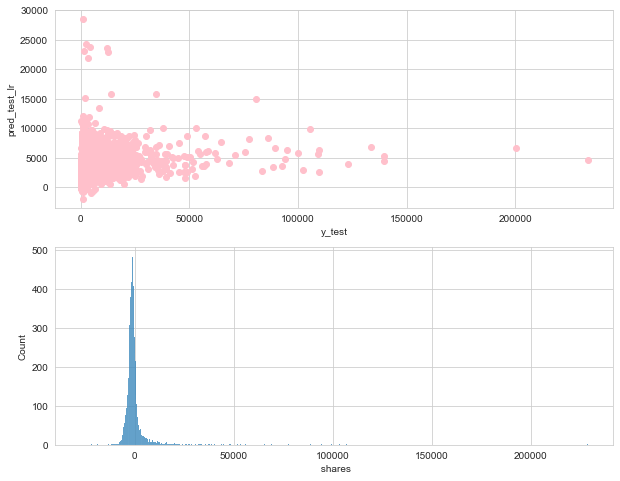

In [131]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.scatter(y_test, pred_test_lr, c = 'pink')
plt.xlabel('y_test')
plt.ylabel('pred_test_lr')

plt.subplot(2, 1, 2)
sns.histplot((y_test - pred_test_lr))

# Ridge Regression

In [132]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_rr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_rr)))
print('R2_score :', metrics.r2_score(y_train, pred_train_rr))

print('\n')


pred_test_rr= rr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_rr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_rr))

For train:
MSE : 149496608.68822533
RMSE : 12226.880578799539
R2_score : 0.022222600355898847


For test:
MSE : 62168077.162550874
RMSE : 7884.673560937756
R2_score : 0.03367196664661609


# Lasso Regression

In [134]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01)
las.fit(X_train, y_train) 
pred_train_las= las.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_las))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_las)))
print('R2_score :', metrics.r2_score(y_train, pred_train_las))

print('\n')

pred_test_las= las.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_las))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_las))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_las))

For train:
MSE : 149512503.72682768
RMSE : 12227.5305653606
R2_score : 0.022118639405558804


For test:
MSE : 62159825.20677476
RMSE : 7884.150252676236
R2_score : 0.03380023338029048


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2311293512702.7017, tolerance: 484904329.58184904
  model = cd_fast.enet_coordinate_descent(


#### We can see that all of them (linear - ridge- lasso) have very bad results!
#### So we use PCA method to see what changes are made.

For linear regression : 


For train:
MSE : 150492813.77645
RMSE : 12267.551254282576
R2_score : 0.015706955424394264


For test:
MSE : 62665698.28756669
RMSE : 7916.166893615034
R2_score : 0.02593704439971578


<AxesSubplot:xlabel=' shares', ylabel='Count'>

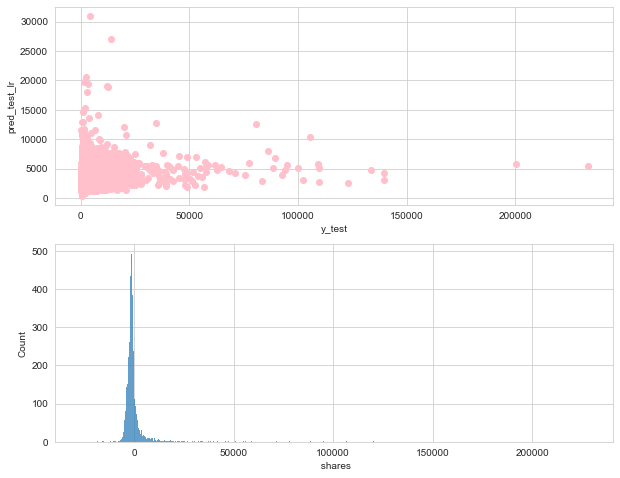

In [139]:
import random
random.seed(10)

# Separate the input features and target variable
X = df.drop(' shares', axis = 1)
y = df[' shares']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)



from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



from sklearn.decomposition import PCA

pca = PCA(20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)




from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)

print('For linear regression : ')
print('\n')
print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr))) 
print('R2_score :', metrics.r2_score(y_train, pred_train_lr))

print('\n')

pred_test_lr= lr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_lr))


plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.scatter(y_test, pred_test_lr, c = 'pink')
plt.xlabel('y_test')
plt.ylabel('pred_test_lr')

plt.subplot(2, 1, 2)
sns.histplot((y_test - pred_test_lr))

#### We see that not only there was no difference, but the result was even worse , so we will not continue for the ridge and lasso regression

# MinMaxScaler

In [140]:
df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\OnlineNewsPopularity\\OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

import random
random.seed(10)

# Separate the input features and target variable
X = df.drop(' shares', axis = 1)
y = df[' shares']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [141]:
from sklearn.preprocessing import MinMaxScaler

Mm = MinMaxScaler()
X_train = Mm.fit_transform(X_train)
X_test = Mm.transform(X_test)

In [142]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr))) 
print('R2_score :', metrics.r2_score(y_train, pred_train_lr))

print('\n')

pred_test_lr= lr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_lr))

For train:
MSE : 149496659.89826828
RMSE : 12226.882672957498
R2_score : 0.02222226541838379


For test:
MSE : 62166816.4271661
RMSE : 7884.59361204914
R2_score : 0.03369156326276623


In [143]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_rr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_rr)))
print('R2_score :', metrics.r2_score(y_train, pred_train_rr))

print('\n')


pred_test_rr= rr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_rr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_rr))

For train:
MSE : 149516447.66494352
RMSE : 12227.69183717612
R2_score : 0.0220928442146906


For test:
MSE : 62161777.657179706
RMSE : 7884.274072936563
R2_score : 0.03376988488559429


In [144]:
from sklearn.linear_model import Lasso

las = Lasso(alpha=0.01)
las.fit(X_train, y_train) 
pred_train_las= las.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_las))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_las)))
print('R2_score :', metrics.r2_score(y_train, pred_train_las))

print('\n')

pred_test_las= las.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_las))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_las))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_las))

For train:
MSE : 149516777.46109003
RMSE : 12227.705322794218
R2_score : 0.02209068719439833


For test:
MSE : 62160733.40557443
RMSE : 7884.207848958222
R2_score : 0.03378611652160601


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89393549769.54004, tolerance: 484904329.58184904
  model = cd_fast.enet_coordinate_descent(



#### The result is still awful.

# polynomial features

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics



df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\OnlineNewsPopularity\\OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

import random
random.seed(10)

X = df.drop([' shares'], axis = 1)
Y = df[' shares']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lr= LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)



print('For train:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_train,y_train_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2)))
print('R2_score :{}'.format(round(metrics.r2_score(y_train, y_train_pred),2)))

print('\n')

print('For test:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_test,y_test_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))) 
print('R2_score :{}'.format(round(metrics.r2_score(y_test, y_test_pred),2)))


For train:
MSE :133314568.7
RMSE :11546.19
R2_score :0.13


For test:
MSE :119975426.08
RMSE :10953.33
R2_score :-0.86


In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics



df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\OnlineNewsPopularity\\OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

import random
random.seed(10)

X = df.drop([' shares'], axis = 1)
Y = df[' shares']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

rr= Ridge(alpha=0.01)
rr.fit(X_train_poly, y_train)

y_train_pred = rr.predict(X_train_poly)
y_test_pred = rr.predict(X_test_poly)



print('For train:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_train,y_train_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2)))
print('R2_score :{}'.format(round(metrics.r2_score(y_train, y_train_pred),2)))

print('\n')

print('For test:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_test,y_test_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))) 
print('R2_score :{}'.format(round(metrics.r2_score(y_test, y_test_pred),2)))


For train:
MSE :133375880.56
RMSE :11548.85
R2_score :0.13


For test:
MSE :113248857.37
RMSE :10641.84
R2_score :-0.76


In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics



df = pd.read_csv('C:\\Users\\Win\\Desktop\\master\\term 2\\Machine learning\\OnlineNewsPopularity\\OnlineNewsPopularity.csv')
df.drop('url', axis = 1, inplace=True)

import random
random.seed(10)

X = df.drop([' shares'], axis = 1)
Y = df[' shares']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

las= Lasso()
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
y_test_pred = las.predict(X_test_poly)



print('For train:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_train,y_train_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2)))
print('R2_score :{}'.format(round(metrics.r2_score(y_train, y_train_pred),2)))

print('\n')

print('For test:')
print('MSE :{}'.format(round(metrics.mean_squared_error(y_test,y_test_pred),2)))
print('RMSE :{}'.format(round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),2))) 
print('R2_score :{}'.format(round(metrics.r2_score(y_test, y_test_pred),2)))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2091483793295.5818, tolerance: 484904329.58184904
  model = cd_fast.enet_coordinate_descent(


For train:
MSE :134264429.57
RMSE :11587.25
R2_score :0.12


For test:
MSE :98354100.29
RMSE :9917.36
R2_score :-0.53


#### It is impossible!!!
#### R2_score always must be in (0, 1)

# Feature selection

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
def forward_feature_selection(data, target, max_features=None):
    
    """ These functions take a feature matrix and a target variable 
            as input and return the indices of the selected features.
        
        Arguments:
                -data : Input,feature matrix , shape = (m,n) 
                -target : Input, target variable,  shape = (m,1)
                -max_features : Input,None, limiting the number of features to be selected.
        Outputs :
                -selected_features : List, Return the indices of the selected features
                
    """
    if max_features is None:
        max_features = data.shape[1] #number of feature
    
    
    selected_features = []
    best_mse = float('inf')
    
    while len(selected_features) < max_features:
        remaining_features = [feature for feature in range(X.shape[1]) if feature not in selected_features]
        current_best_mse = float('inf')
        current_best_feature = None

        for feature in remaining_features:
            trial_features = selected_features + [feature]
             
            #using linear regression for simplicity    
            X_train, X_test, y_train, y_test = train_test_split(data[:, trial_features], target, test_size=0.2, random_state=101)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < current_best_mse:
                current_best_mse = mse
                current_best_feature = feature

        if current_best_mse < best_mse:
            selected_features.append(current_best_feature)
            best_mse = current_best_mse
        else:
            break

    return selected_features


In [10]:
f =forward_feature_selection(X.values, y.values)

In [182]:
f

[26,
 25,
 24,
 23,
 13,
 40,
 41,
 30,
 37,
 6,
 12,
 10,
 43,
 45,
 58,
 9,
 57,
 56,
 35,
 33,
 31,
 5,
 20]

In [183]:
len(f)

23

In [197]:
type(f)

list

In [11]:
df1 = df.iloc[:, f]
df = pd.concat([df1, df[' shares']],axis = 1)

In [201]:
df.head()

,kw_avg_avg,kw_max_avg,kw_min_avg,kw_avg_max,data_channel_is_entertainment,LDA_02,LDA_03,weekday_is_monday,is_weekend,num_hrefs,...,abs_title_sentiment_polarity,num_videos,abs_title_subjectivity,title_sentiment_polarity,weekday_is_saturday,weekday_is_thursday,weekday_is_tuesday,n_non_stop_unique_tokens,kw_avg_min,shares
0,0.0,0.0,0.0,0.0,1.0,0.040005,0.041263,1.0,0.0,4.0,...,0.187500,0.0,0.000000,-0.187500,0.0,0.0,0.0,0.815385,0.0,593
1,0.0,0.0,0.0,0.0,0.0,0.050096,0.050101,1.0,0.0,3.0,...,0.000000,0.0,0.500000,0.000000,0.0,0.0,0.0,0.791946,0.0,711
2,0.0,0.0,0.0,0.0,0.0,0.033351,0.033334,1.0,0.0,3.0,...,0.000000,0.0,0.500000,0.000000,0.0,0.0,0.0,0.663866,0.0,1500
3,0.0,0.0,0.0,0.0,1.0,0.494651,0.028905,1.0,0.0,9.0,...,0.000000,0.0,0.500000,0.000000,0.0,0.0,0.0,0.665635,0.0,1200
4,0.0,0.0,0.0,0.0,0.0,0.028575,0.028572,1.0,0.0,19.0,...,0.136364,0.0,0.045455,0.136364,0.0,0.0,0.0,0.540890,0.0,505


In [12]:
import random
random.seed(10)

# Separate the input features and target variable
X = df.drop(' shares', axis = 1)
y = df[' shares']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# making standard data with mean = 0, varinace = 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr = lr.predict(X_train)

print('For train:')
print('MSE :', metrics.mean_squared_error(y_train,pred_train_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr))) 
print('R2_score :', metrics.r2_score(y_train, pred_train_lr))

print('\n')

pred_test_lr= lr.predict(X_test)
print('For test:')
print('MSE :', metrics.mean_squared_error(y_test,pred_test_lr))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print('R2_score :', metrics.r2_score(y_test, pred_test_lr))

For train:
MSE : 150293816.3103336
RMSE : 12259.43784642402
R2_score : 0.017008491470344667


For test:
MSE : 61732589.898383014
RMSE : 7857.008966418647
R2_score : 0.04044109271164531


### Absolute Error

In [16]:
df = pd.concat([df1, df[' shares']],axis = 1)

import random
random.seed(10)

# Separate the input features and target variable
X = df.drop(' shares', axis = 1)
y = df[' shares']

X = X.values
y = y.values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# making standard data with mean = 0, varinace = 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Define the MAE cost function
def cost_function(y_true, y_pred):
    m = len(y_true)
    return (1 / m) * np.sum(np.abs(y_true - y_pred))

# Initialize the model parameters
m, n = X_train.shape
theta = np.random.randn(n, 1)
bias = np.random.randn()

# Define the model
def linear_regression(X, theta, bias):
    return np.dot(X, theta) + bias

# Calculate gradients
def gradients(X, y, y_pred):
    m = len(y)
    grad_theta = (1 / m) * np.dot(X.T, np.sign(y_pred - y))
    grad_bias = (1 / m) * np.sum(np.sign(y_pred - y))
    return grad_theta, grad_bias

# Update the model parameters using gradient descent
def gradient_descent(X, y, theta, bias, learning_rate, iterations):
    for i in range(iterations):
        y_pred = linear_regression(X, theta, bias)
        grad_theta, grad_bias = gradients(X, y, y_pred)
        theta -= learning_rate * grad_theta
        bias -= learning_rate * grad_bias
        cost = cost_function(y, y_pred)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    return theta, bias

# Train the model
learning_rate = 0.1
iterations = 10000
theta, bias = gradient_descent(X_train, y_train.reshape(-1, 1), theta, bias, learning_rate, iterations)


Iteration 0: Cost = 3407.9727926833016
Iteration 1000: Cost = 3308.290880406221
Iteration 2000: Cost = 3209.5171742269235
Iteration 3000: Cost = 3111.5757972822316
Iteration 4000: Cost = 3014.7426870586405
Iteration 5000: Cost = 2921.481077852488
Iteration 6000: Cost = 2835.2567075768097
Iteration 7000: Cost = 2758.641906025827
Iteration 8000: Cost = 2693.185942911862
Iteration 9000: Cost = 2639.7585940918316


In [19]:
y_test_pred = linear_regression(X_test, theta, bias)
mae_test = cost_function(y_test, y_test_pred)
print(f"Mean Absolute Error on the test set: {mae_test}")

Mean Absolute Error on the test set: 20159546.78124045


Text(0, 0.5, 'pred_test_lr')

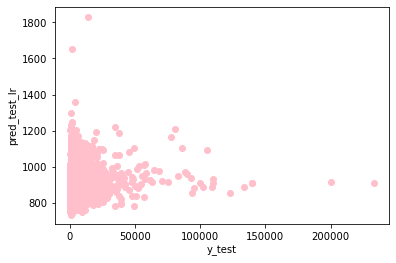

In [20]:
plt.scatter(y_test, y_test_pred, c = 'pink')
plt.xlabel('y_test')
plt.ylabel('pred_test_lr')


#### ----------------------------------------------------------------------------------------------

# Question 13

In [118]:
import numpy as np
import pandas as pd

In [119]:
!pip install palmerpenguins

In [120]:
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [121]:
df.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

#### We have missing value

In [122]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

<AxesSubplot:>

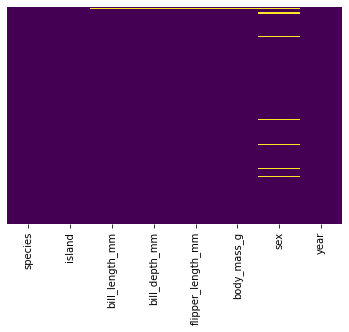

In [123]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [126]:
# Cleaning missing value

df = df.dropna()

X = df.drop(columns=['species'])
y = df['species'] # target

# Encoding categorical columns and target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["island"] = le.fit_transform(X["island"])
X["sex"] = le.fit_transform(X["sex"])
y = le.fit_transform(y)

In [136]:
# calculate the softmax of a vector
def softmax(vector):
    e = np.exp(vector)
    return e / np.sum(e, axis=1, keepdims=True)

def cross_entropy(y, y_pred):
    loss=-np.sum(y * np.log(y_pred))
    return loss/float(y_pred.shape[0])

def gradient(X, y, theta):
    m = X.shape[0]
    y_pred = softmax(np.dot(X, theta))
    y_true = np.zeros_like(y_pred)
    y_true[np.arange(m), y] = 1
    return np.dot(X.T, y_pred - y_true) / m